In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.colors as mcolors


### Read in data

In [4]:
df = pd.read_csv('data/inv_pharma_wIPC.csv')

In [5]:
app = pd.read_csv('data/app_reg_pharma.csv')

In [6]:
import geopandas as gpd

file_path = 'Palma72H/NUTS_RG_20M_2021_3035.shp/NUTS_RG_20M_2021_3035.shp'

gdf = gpd.read_file(file_path)

# print(gdf.head())

In [7]:
uk_gdf = gdf[gdf['CNTR_CODE'].str.contains('UK')]
# print(len(uk_gdf))
# print(uk_gdf.head())

In [8]:
df.head()

Unnamed: 0        app_nbr    appln_id  person_id                 inv_name  \
0           0  EP19780100395  16427449.0  2214748.0  Johnston, Michael Denis   
1           1  EP19780100395  16427449.0  2214748.0  Johnston, Michael Denis   
2           2  EP19780100395  16427449.0  2214748.0  Johnston, Michael Denis   
3           3  EP19780100463  16427512.0  2214885.0        Wilkinson, Samuel   
4           4  EP19780100463  16427512.0  2214885.0        Wilkinson, Samuel   

                             address reg_code ctry_code  prio_year  app_year  \
0       16 Altyre Way,Beckenham Kent    UKJ42        GB     1977.0    1978.0   
1       16 Altyre Way,Beckenham Kent    UKJ42        GB     1977.0    1978.0   
2       16 Altyre Way,Beckenham Kent    UKJ42        GB     1977.0    1978.0   
3  12 Bevington Road,Beckenham, Kent    UKJ42        GB     1977.0    1978.0   
4  12 Bevington Road,Beckenham, Kent    UKJ42        GB     1977.0    1978.0   

           IPC  
0   A61K038/21  
1  C07K014/555  
2   C12P021/00  
3   A61K038/00  
4   A61P001/12

In [9]:
app=app[app['ctry_code'] == 'GB']

In [10]:
app = app.merge(df[['app_nbr', 'prio_year']], on='app_nbr', how='left')
app = app.drop_duplicates()
app.head()

app_nbr  appln_id  \
0   EP20000107845       2.0   
15  EP20000107845       2.0   
30  EP20010940394    1254.0   
31  EP20010983998    1283.0   
33  EP20040715947    1516.0   

                                             app_name  \
0                            Medical Research Council   
15                                  MEDIMMUNE LIMITED   
30                                       Unilever PLC   
31  Cambridge University Hospitals NHS Foundation ...   
33                  BRITANNIA PHARMACEUTICALS LIMITED   

                                              address reg_code ctry_code  \
0                     20 Park Crescent,London W1B 1AL    UKI11        GB   
15  Milstein Building Granta Park Cambridge,Cambri...    UKH12        GB   
30  Unilever House 100 Victoria Embankment London,...    UKI11        GB   
31                       Hills Road Cambridge,CB2 2QQ    UKH12        GB   
33  Forum House, 41-51 Brighton Road Redhill,Surre...    UKJ23        GB   

    reg_share  app_share  prio_year  
0         1.0        0.5     1991.0  
15        1.0        0.5     1991.0  
30        1.0        0.5     2000.0  
31        1.0        1.0     2000.0  
33        1.0        1.0     2003.0

In [11]:
# Convert to lowercase and strip leading/trailing spaces
app['app_name'] = app['app_name'].str.lower().str.strip()

In [12]:
mapping_dict = {
    'UKK21': ['UKK24'],
    'UKK22': ['UKK25'],
    'UKM21': ['UKM71'],
    'UKM22': ['UKM72'],
    'UKM23': ['UKM73'],
    'UKM25': ['UKM75'],
    'UKM26': ['UKM76'],
    'UKM27': ['UKM77'],
    'UKM28': ['UKM78'],
    'UKM31': ['UKM81'],
    'UKM34': ['UKM82'],
    'UKM35': ['UKM83'],
    'UKM36': ['UKM84'],
    'UKM24': ['UKM91'],
    'UKM33': ['UKM93'],
    'UKM37': ['UKM94'],
    'UKM38': ['UKM95'],
    'UKN01': ['UKN06'],
    'UKD31': ['UKD33', 'UKD34', 'UKD35'],
    'UKD32': ['UKD36', 'UKD37'],
    'UKD43': ['UKD44', 'UKD45', 'UKD46', 'UKD47'],
    'UKH13': ['UKH15', 'UKH16', 'UKH17'],
    'UKH33': ['UKH34', 'UKH35', 'UKH36', 'UKH37'],
    'UKI11': ['UKI31', 'UKI32', 'UKI33', 'UKI34'],
    'UKI12': ['UKI41', 'UKI42', 'UKI43', 'UKI44', 'UKI45'],
    'UKI21': ['UKI51', 'UKI52', 'UKI53', 'UKI54'],
    'UKI22': ['UKI61', 'UKI62', 'UKI63'],
    'UKI23': ['UKI71', 'UKI72', 'UKI73', 'UKI74', 'UKI75'],
    'UKJ23': ['UKJ25', 'UKJ26'],
    'UKJ24': ['UKJ27', 'UKJ28'],
    'UKJ33': ['UKJ35', 'UKJ36', 'UKJ37'],
    'UKJ42': ['UKJ43', 'UKJ44', 'UKJ45', 'UKJ46']
}

### Descriptive Analysis 

Remove duplicates due to multiple IPC and author.
IPC_Pharma only to 2016

In [13]:
df_da = df[['app_nbr','reg_code','prio_year']]
df_da.head()

app_nbr reg_code  prio_year
0  EP19780100395    UKJ42     1977.0
1  EP19780100395    UKJ42     1977.0
2  EP19780100395    UKJ42     1977.0
3  EP19780100463    UKJ42     1977.0
4  EP19780100463    UKJ42     1977.0

In [14]:
df_da = df_da.drop_duplicates()
df_da.head()

app_nbr reg_code  prio_year
0   EP19780100395    UKJ42     1977.0
3   EP19780100463    UKJ42     1977.0
11  EP19780100669    UKI22     1977.0
14  EP19780100690    UKH23     1977.0
23  EP19780100717    UKI23     1977.0

In [15]:
print("Before dropping, "+ str(len(df)) +" rows.")
print("After dropping, "+ str(len(df_da)) +" rows.")

Before dropping, 208113 rows.
After dropping, 31484 rows.


In [16]:
df_da['prio_year'] = df_da['prio_year'].astype(int).astype(str)
df_da = df_da[df_da['prio_year'] != '2017']

In [17]:
# Convert 'prio_year' to integer
df_da['prio_year'] = df_da['prio_year'].astype(int)

# Get the range of years
years = df_da['prio_year'].unique()

# Initialize an empty DataFrame to store the results
results = {}

# Loop over each year
for year in years:
    # Filter the data for the current year
    df_year = df_da[df_da['prio_year'] == year]
    
    # Calculate the total number of patents for each region
    total_patents_per_region = df_year.groupby('reg_code')['app_nbr'].nunique()
    
    # Calculate the total number of patents for the year
    total_patents = df_year['app_nbr'].nunique()
    
    # Get descriptive statistics
    desc_stats = total_patents_per_region.describe()
    
    # Add the total number of patents to the descriptive statistics
    desc_stats = desc_stats.append(pd.Series(total_patents, index=['total_pharma_patents']))
    
    # Append the results to the results dictionary
    results[year] = desc_stats

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                           1977        1978        1979        1980  \
count                 22.000000   35.000000   36.000000   42.000000   
mean                   3.727273    5.800000    6.000000    5.428571   
std                    4.014045    8.463764    8.802597    7.893013   
min                    1.000000    1.000000    1.000000    1.000000   
25%                    1.000000    1.000000    1.000000    1.000000   
50%                    1.500000    2.000000    2.000000    2.000000   
75%                    5.000000    4.500000    6.250000    5.750000   
max                   17.000000   36.000000   38.000000   36.000000   
total_pharma_patents  82.000000  203.000000  216.000000  228.000000   

                            1981        1982        1983        1984  \
count                  46.000000   50.000000   56.000000   61.000000   
mean                    6.478261    5.900000    6.357143    5.901639   
std                     9.052290    9.107633    8.969501    8.603691   
m

In [18]:
import seaborn as sns
import numpy as np

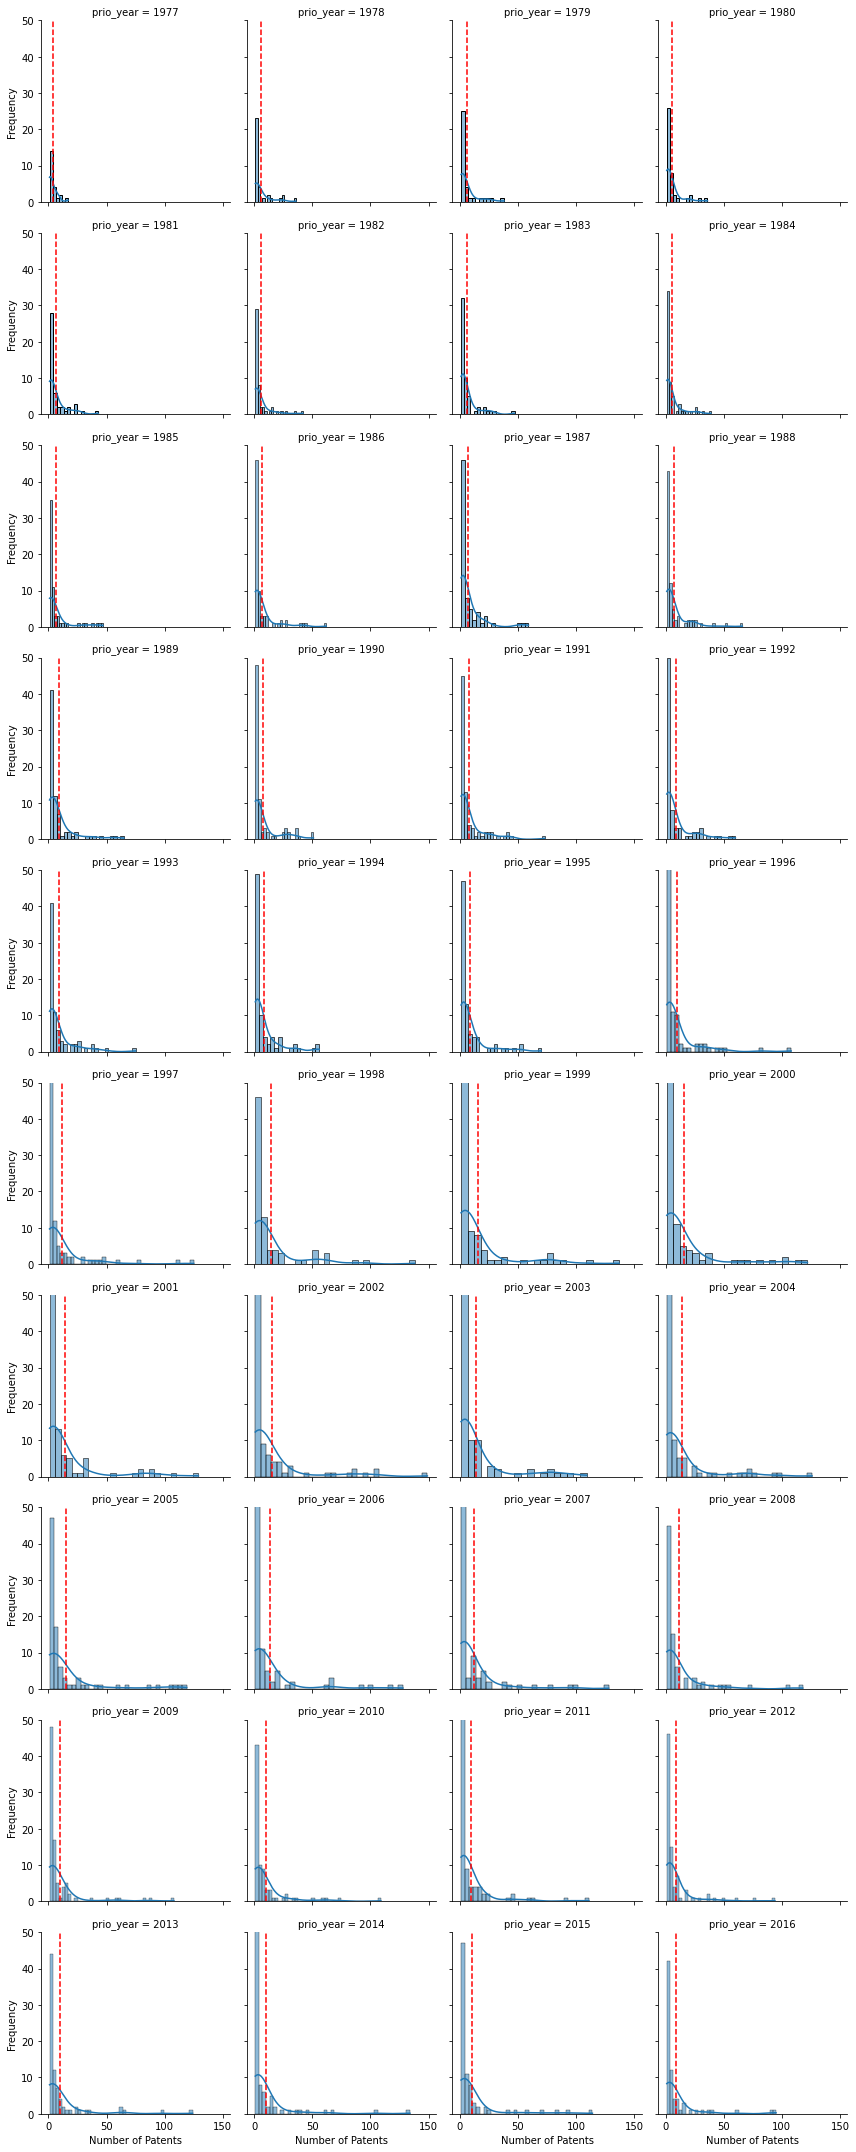

In [16]:
#x-axis: number of patents for each region
#y-axis: frequency of number of patents
def set_xticks(x, **kwargs):
    xticks = plt.xticks()[0]

    n = 10  
    xticks = xticks[::n]

    plt.xticks(xticks)
    
df_grouped = df_da.groupby(['prio_year', 'reg_code']).size().reset_index(name='counts')
# Convert 'prio_year' to categorical so that the plots are ordered by year
df_grouped['prio_year'] = pd.Categorical(df_grouped['prio_year'], ordered=True, categories=sorted(df_grouped['prio_year'].unique()))
# Define a function to plot a vertical line at the mean
def plot_mean(data, **kwargs):
    plt.axvline(data.mean(), color='r', linestyle='--')

# Create a FacetGrid object
g = sns.FacetGrid(df_grouped, col="prio_year", col_wrap=4, height=3, aspect=1)

# Map a histogram to each subplot
g = g.map(sns.histplot, "counts", kde=True)

# Add the mean
g = g.map(plot_mean, "counts")

# Set y-axis limits
g.set(ylim=(0, df_grouped['counts'].quantile(0.95)))

# Set labels
g.set_axis_labels('Number of Patents', 'Frequency')
# g = g.map(set_xticks, "counts")

# for ax in g.axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)  # Rotate labels to 90 degrees

# # Adjust the layout
# plt.tight_layout()
# plt.subplots_adjust(hspace=0.5)

plt.savefig('distribution.png', dpi=300, bbox_inches='tight')
plt.show()


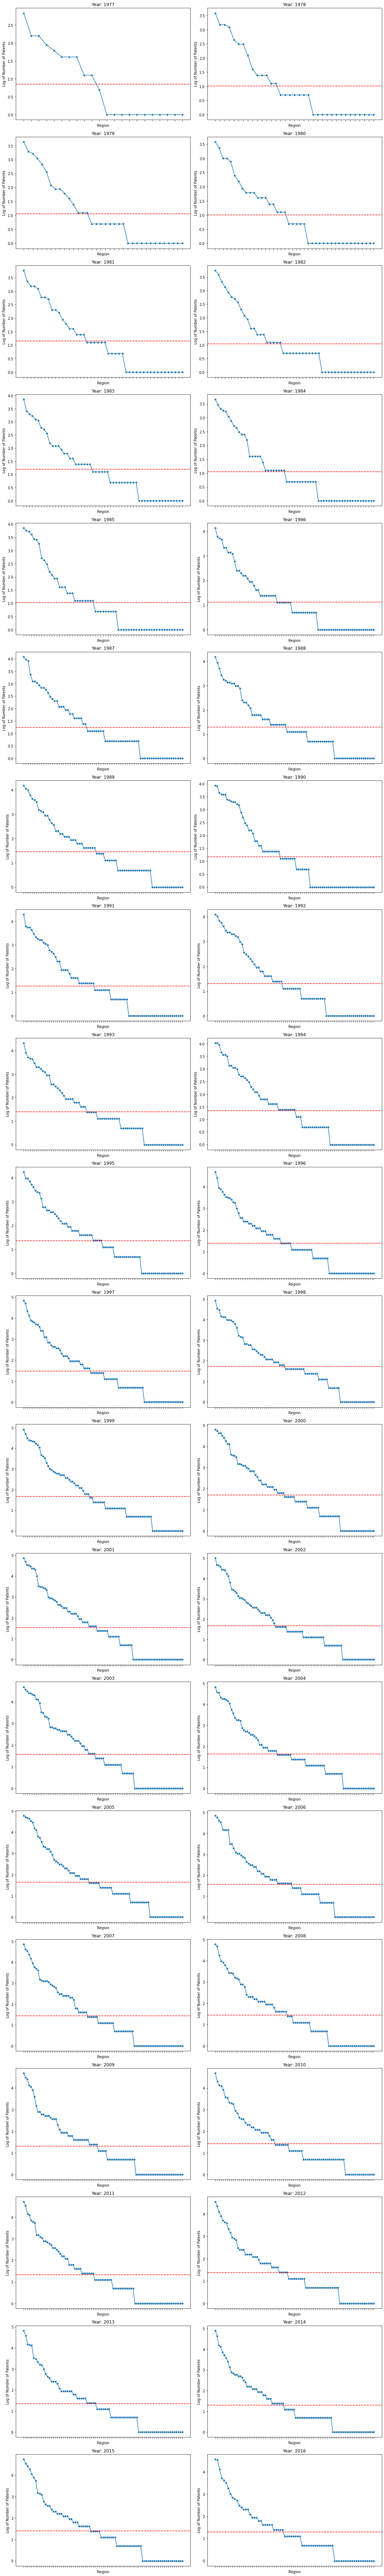

In [19]:
top_regions = df_da['reg_code'].value_counts().index[:5]

# Get the number of unique years
num_years = df_da['prio_year'].nunique()
# Calculate the number of rows needed for the subplots
num_rows = int(np.ceil(num_years / 2))

fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))

# Reshape the axes for easy iteration
axs = axs.ravel()

for i, year in enumerate(sorted(df_da['prio_year'].unique())):
    
    df_year = df_da[df_da['prio_year'] == year]
    # Count the number of patents for each region
    df_year_counts = df_year['reg_code'].value_counts().reset_index()
    df_year_counts.columns = ['reg_code', 'counts']
    sns.lineplot(data=df_year_counts, x='reg_code', y=np.log(df_year_counts['counts']), marker='o', ax=axs[i])
    
    axs[i].set_title(f'Year: {year}')
    
    axs[i].set_xlabel('Region')
    
    axs[i].set_ylabel('Log of Number of Patents')

    # Only label the top 5 regions
    labels = [label if label in top_regions else '' for label in axs[i].get_xticklabels()]
    axs[i].set_xticklabels(labels)

    # Add a horizontal line for the mean
    axs[i].axhline(np.log(df_year_counts['counts']).mean(), color='red', linestyle='--')

# If there's an extra subplot, remove it
if num_years % 2 != 0:
    fig.delaxes(axs[-1])
    
plt.tight_layout()
plt.savefig('distri_number.png', dpi=300, bbox_inches='tight')
plt.show()


In [20]:
inv = pd.read_csv('data/INV_IPC_SECTION_prior.csv')

inv = inv.drop(['IPC_Section'], axis = 1)
inv = inv.drop_duplicates()

In [21]:
all_patents_yearly = inv.groupby('prio_year')['app_nbr'].count()
all_patents_yearly = all_patents_yearly[0:40]
# all_patents_yearly = all_patents_yearly.reset_index()
# all_patents_yearly

In [22]:
results_df.loc['total_patents'] = all_patents_yearly

In [23]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

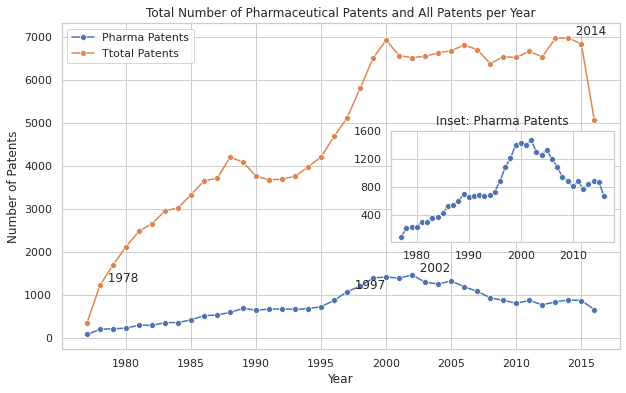

In [33]:
# Calculate the change in total patents compared to the previous year
results_df.loc['change'] = results_df.loc['total_pharma_patents'].diff()
results_df.loc['total_change'] = results_df.loc['total_patents'].diff()

# Find the year with the highest total patents
max_patents_year = results_df.loc['total_pharma_patents'].idxmax()
max_total_year = results_df.loc['total_patents'].idxmax()

# Find the year with the highest change in total patents
max_change_year = results_df.loc['change'].idxmax()
max_total_change_year = results_df.loc['total_change'].idxmax()

# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=results_df.columns, y=results_df.loc['total_pharma_patents'], marker='o', ax=ax,label='Pharma Patents')
sns.lineplot(x=results_df.columns, y=results_df.loc['total_patents'], marker='o', ax=ax,label='Ttotal Patents')

# Add a label for the year with the highest total patents
ax.text(max_patents_year, results_df.loc['total_pharma_patents', max_patents_year], f'  {max_patents_year}', verticalalignment='bottom')
ax.text(max_total_year, results_df.loc['total_patents', max_total_year], f'  {max_total_year}', verticalalignment='bottom')

ax.legend()
# Add a label for the year with the highest change in total patents
ax.text(max_change_year, results_df.loc['total_pharma_patents', max_change_year], f'  {max_change_year}', verticalalignment='bottom')
ax.text(max_total_change_year, results_df.loc['total_patents', max_total_change_year], f'  {max_total_change_year}', verticalalignment='bottom')
# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Patents')
ax.set_title('Total Number of Pharmaceutical Patents and All Patents per Year')

# Inset Axes
axins = inset_axes(ax, width='40%', height='34%', loc='right')
sns.lineplot(x=results_df.columns, y=results_df.loc['total_pharma_patents'], marker='o', ax=axins)
axins.set_xticks([1980, 1990, 2000, 2010])
axins.set_yticks([400, 800, 1200, 1600])
axins.set_ylabel('')
axins.set_title('Inset: Pharma Patents')
axins.grid(True)

plt.savefig('Total_Patents.png', dpi=300, bbox_inches='tight')
plt.show()


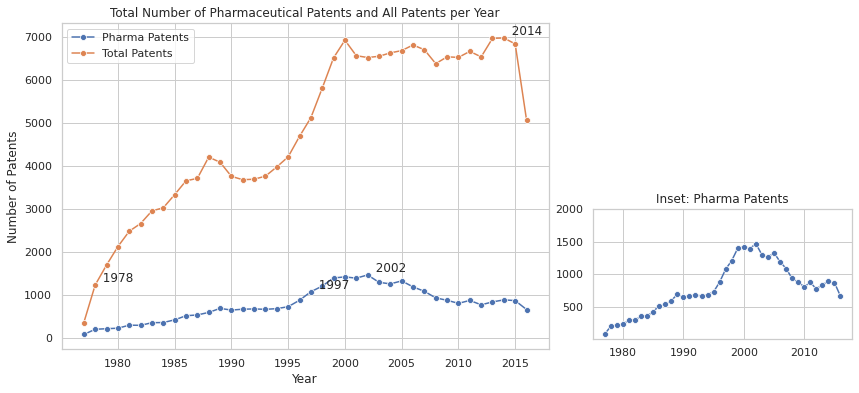

In [47]:
# Calculate the change in total patents compared to the previous year
results_df.loc['change'] = results_df.loc['total_pharma_patents'].diff()
results_df.loc['total_change'] = results_df.loc['total_patents'].diff()

# Find the year with the highest total patents
max_patents_year = results_df.loc['total_pharma_patents'].idxmax()
max_total_year = results_df.loc['total_patents'].idxmax()

# Find the year with the highest change in total patents
max_change_year = results_df.loc['change'].idxmax()
max_total_change_year = results_df.loc['total_change'].idxmax()

# Create main and inset subplots
sns.set_theme(style="whitegrid")
fig, (ax_main, ax_inset) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [0.8, 0.2]})

# Total number of patents per year
sns.lineplot(x=results_df.columns, y=results_df.loc['total_pharma_patents'], marker='o', ax=ax_main, label='Pharma Patents')
sns.lineplot(x=results_df.columns, y=results_df.loc['total_patents'], marker='o', ax=ax_main, label='Total Patents')

# Add a label for the year with the highest total patents
ax_main.text(max_patents_year, results_df.loc['total_pharma_patents', max_patents_year], f'  {max_patents_year}', verticalalignment='bottom')
ax_main.text(max_total_year, results_df.loc['total_patents', max_total_year], f'  {max_total_year}', verticalalignment='bottom')

ax_main.legend()
# Add a label for the year with the highest change in total patents
ax_main.text(max_change_year, results_df.loc['total_pharma_patents', max_change_year], f'  {max_change_year}', verticalalignment='bottom')
ax_main.text(max_total_change_year, results_df.loc['total_patents', max_total_change_year], f'  {max_total_change_year}', verticalalignment='bottom')

# Set labels and title for the main subplot
ax_main.set_xlabel('Year')
ax_main.set_ylabel('Number of Patents')
ax_main.set_title('Total Number of Pharmaceutical Patents and All Patents per Year')

# Inset Axes
sns.lineplot(x=results_df.columns, y=results_df.loc['total_pharma_patents'], marker='o', ax=ax_inset)
ax_inset.set_xticks([1980, 1990, 2000, 2010])  # Set your desired xticks
ax_inset.set_yticks([500, 1000, 1500, 2000])
ax_inset.set_title('Inset: Pharma Patents')
ax_inset.set_ylabel('')  # Remove the y-axis label
ax_inset.grid(True)  # Add grid lines to the inset axes
ax_inset.set_position([0.74, 0.15, 0.3, 0.3])  # Adjust the position of the inset axes

# Save and show the plot
plt.savefig('Total_Patents.png', dpi=300, bbox_inches='tight')
plt.show()


### Pharma/Total

In [48]:
results_df.loc['share'] = results_df.loc['total_pharma_patents']/results_df.loc['total_patents']
results_df

1977         1978         1979         1980  \
count                  22.000000    35.000000    36.000000    42.000000   
mean                    3.727273     5.800000     6.000000     5.428571   
std                     4.014045     8.463764     8.802597     7.893013   
min                     1.000000     1.000000     1.000000     1.000000   
25%                     1.000000     1.000000     1.000000     1.000000   
50%                     1.500000     2.000000     2.000000     2.000000   
75%                     5.000000     4.500000     6.250000     5.750000   
max                    17.000000    36.000000    38.000000    36.000000   
total_pharma_patents   82.000000   203.000000   216.000000   228.000000   
total_patents         359.000000  1233.000000  1697.000000  2126.000000   
change                       NaN   121.000000    13.000000    12.000000   
total_change                 NaN   874.000000   464.000000   429.000000   
share                   0.228412     0.164639     0.127283     0.107244   

                             1981         1982         1983         1984  \
count                   46.000000    50.000000    56.000000    61.000000   
mean                     6.478261     5.900000     6.357143     5.901639   
std                      9.052290     9.107633     8.969501     8.603691   
min                      1.000000     1.000000     1.000000     1.000000   
25%                      1.000000     1.000000     1.000000     1.000000   
50%                      3.000000     2.000000     3.000000     2.000000   
75%                      6.750000     4.750000     6.250000     5.000000   
max                     43.000000    42.000000    47.000000    39.000000   
total_pharma_patents   298.000000   295.000000   356.000000   360.000000   
total_patents         2483.000000  2663.000000  2957.000000  3029.000000   
change                  70.000000    -3.000000    61.000000     4.000000   
total_change           357.000000   180.000000   294.000000    72.000000   
share                    0.120016     0.110777     0.120392     0.118851   

                             1985         1986  ...         2007         2008  \
count                   63.000000    75.000000  ...    90.000000    82.000000   
mean                     6.698413     6.906667  ...    12.111111    11.402439   
std                     11.276059    11.501085  ...    22.713875    20.936034   
min                      1.000000     1.000000  ...     1.000000     1.000000   
25%                      1.000000     1.000000  ...     1.000000     1.000000   
50%                      2.000000     2.000000  ...     3.000000     3.000000   
75%                      5.000000     5.500000  ...    11.000000     9.000000   
max                     47.000000    62.000000  ...   128.000000   118.000000   
total_pharma_patents   422.000000   518.000000  ...  1086.000000   933.000000   
total_patents         3335.000000  3656.000000  ...  6705.000000  6382.000000   
change                  62.000000    96.000000  ...  -103.000000  -153.000000   
total_change           306.000000   321.000000  ...  -111.000000  -323.000000   
share                    0.126537     0.141685  ...     0.161969     0.146192   

                             2009         2010         2011         2012  \
count                   90.000000    80.000000    88.000000    85.000000   
mean                     9.744444    10.087500     9.943182     9.094118   
std                     19.158453    18.275801    18.791266    16.324553   
min                      1.000000     1.000000     1.000000     1.000000   
25%                      1.000000     2.000000     1.000000     2.000000   
50%                      3.000000     3.000000     3.000000     3.000000   
75%                      7.000000     8.250000     9.000000     8.000000   
max                    108.000000   109.000000   111.000000    94.000000   
total_pharma_patents   877.000000   806.000000   874.000000   772.000000   
total_patents    

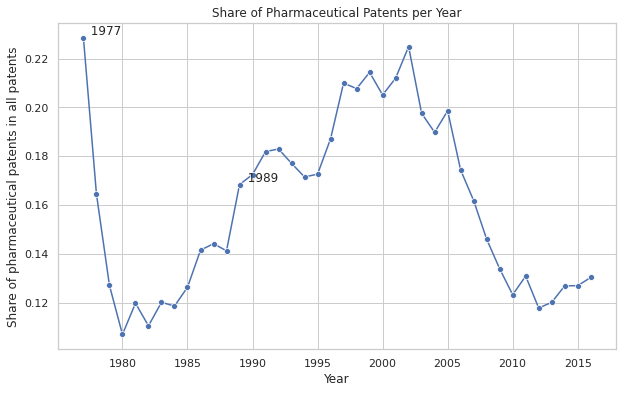

In [49]:
# Calculate the change in share compared to the previous year
results_df.loc['share_change'] = results_df.loc['share'].diff()

# Find the year with the highest share
max_patents_year = results_df.loc['share'].idxmax()

# Find the year with the highest change in share
max_change_year = results_df.loc['share_change'].idxmax()

# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=results_df.columns, y=results_df.loc['share'], marker='o', ax=ax)

# Add a label for the year with the highest total patents
ax.text(max_patents_year, results_df.loc['share', max_patents_year], f'  {max_patents_year}', verticalalignment='bottom')

# Add a label for the year with the highest change in total patents
ax.text(max_change_year, results_df.loc['share', max_change_year], f'  {max_change_year}', verticalalignment='bottom')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Share of pharmaceutical patents in all patents')
ax.set_title('Share of Pharmaceutical Patents per Year')
plt.savefig('share.png', dpi=300, bbox_inches='tight')
plt.show()



In [50]:
data = [
    ("Imperial Incubator (London)", "W12 0BZ", 2006),
    ("London Bioscience Innovation Centre", "NW1 0NH", 2001),
    ("Mersey Bio Incubator", "NW1 0NH", 2004),
    ("Queen Mary Bio science Innovation Centre", "L69 7ZB", 2008),
    ("Sheffield Bio Incubator", "S3 7RD", 2006),
    ("Bradford Laboratories", "BD7 1DP", 2006),
    ("Babraham Bioscience incubator", "CB22 3AT", 1998),
    ("Cardiff Medicentre", "CF14 4UJ", 1992),
    ("Cardiothoracic bio Incubator (Papworth)", "CB2 0AY", 2006),
    ("C-TRIC (Northern Ireland)", "BT47 6SB", 2009),
    ("ILS (Swansea)", "SA2 8QA", 2012),
    ("Edinburgh bio Quarter", "EH16 4UX", 2013),
    ("BioCity Nottingham", "NG1 1GF", 2003),
    ("BioPark Hertfordshire", "AL10 9AB", 2006),
    ("DiagNox (Oxford)", "OX25 5HD", 2003),
    ("BioCity Scotland", "ML1 5UH", 2011),
    ("Stevenage Bioscience Catalyst", "SG1 2FX", 2011),
    ("BioHub (Alderley Park)", "SK10 4TG", 2014),
    ("Medicity (Boots)", "NG90 6BH", 2013),
    ("Colworth Science Park","MK44 1LQ",2004),
    ("Leeds Bioincubator", "LS2 9NH", 2007),
    ("Manchester (UMIC)","M13 9WU", 1999),
    ("Norwich Bioincubator", "NR4 7UH", 2002),
    ("Roslin", "EH25 9RG", 1999),
    ("Tetricus Bioscience", "SP2 7YW", 2002),
    ("York Biocentre", "YO10 5NY", 2003)
]

incubator = pd.DataFrame(data, columns=["Incubator", "Postcode", "Start Year"])
# print(incubator)


In [51]:
# # Plot
# sns.set_theme(style="whitegrid")
# fig, ax = plt.subplots(figsize=(10, 6))

# # Total number of patents per year
# sns.lineplot(x=results_df.columns, y=results_df.loc['share'], marker='o', ax=ax)

# # Add a label for the year with the highest total patents
# ax.text(max_patents_year, results_df.loc['share', max_patents_year], f'  {max_patents_year}', verticalalignment='bottom')

# # Add a label for the year with the highest change in total patents
# ax.text(max_change_year, results_df.loc['share', max_change_year], f'  {max_change_year}', verticalalignment='bottom')

# # Add vertical lines for each year an incubator started
# for year in incubator['Start Year']:
#     ax.axvline(x=year, color='r', linestyle='--')

# # Set labels and title
# ax.set_xlabel('Year')
# ax.set_ylabel('Share of pharmaceutical patents in all patents')
# ax.set_title('Share of Pharmaceutical Patents per Year')
# plt.savefig('share_INCU.png', dpi=300, bbox_inches='tight')
# plt.show()


In [35]:
results_df_T = results_df.transpose()

In [37]:
results_df_T = results_df_T.reset_index()

In [39]:
results_df_T.columns.values[0] = 'prio_year'

In [46]:
results_df_T = results_df_T.reset_index()

In [48]:
# result_df_T = pd.read_csv('data/descriptive.csv')
results_df_T['prio_year'] = pd.to_numeric(results_df_T['prio_year'])

In [49]:

results_df_T.head()

level_0  prio_year  count      mean       std  min  25%  50%   75%   max  \
0        0       1977   22.0  3.727273  4.014045  1.0  1.0  1.5  5.00  17.0   
1        1       1978   35.0  5.800000  8.463764  1.0  1.0  2.0  4.50  36.0   
2        2       1979   36.0  6.000000  8.802597  1.0  1.0  2.0  6.25  38.0   
3        3       1980   42.0  5.428571  7.893013  1.0  1.0  2.0  5.75  36.0   
4        4       1981   46.0  6.478261  9.052290  1.0  1.0  3.0  6.75  43.0   

   total_pharma_patents  total_patents  change  total_change     share  \
0                  82.0          359.0     NaN           NaN  0.228412   
1                 203.0         1233.0   121.0         874.0  0.164639   
2                 216.0         1697.0    13.0         464.0  0.127283   
3                 228.0         2126.0    12.0         429.0  0.107244   
4                 298.0         2483.0    70.0         357.0  0.120016   

   share_change  
0           NaN  
1     -0.063773  
2     -0.037356  
3     -0.020040  
4      0.012772

In [50]:
# results_df_T.to_csv('data/descriptive.csv', index=False)

In [52]:
results_df_T = pd.read_csv('data/descriptive.csv')

In [53]:
results_df_T.head()

prio_year  number of regions      mean       std  min  25%  50%   75%  max  \
0       1977                 22  3.727273  4.014045    1  1.0  1.5  5.00   17   
1       1978                 35  5.800000  8.463764    1  1.0  2.0  4.50   36   
2       1979                 36  6.000000  8.802597    1  1.0  2.0  6.25   38   
3       1980                 42  5.428571  7.893013    1  1.0  2.0  5.75   36   
4       1981                 46  6.478261  9.052290    1  1.0  3.0  6.75   43   

   pharma_patents  pharma_change  total_patents  total_change     share  \
0              82            NaN            359           NaN  0.228412   
1             203          121.0           1233         874.0  0.164639   
2             216           13.0           1697         464.0  0.127283   
3             228           12.0           2126         429.0  0.107244   
4             298           70.0           2483         357.0  0.120016   

   share_change  
0           NaN  
1     -0.063773  
2     -0.037356  
3     -0.020040  
4      0.012772

### Incubators

In [53]:
# ! pip install opencage

In [54]:
from opencage.geocoder import OpenCageGeocode

geocoder = OpenCageGeocode('095f94f051f44c6089a2cb4fb9e56629')

def get_coordinates_none(postcode):
    result = geocoder.geocode(postcode, countrycode='gb')
    if result:
        lat = result[0]['geometry']['lat']
        lng = result[0]['geometry']['lng']
        return pd.Series([lat, lng])
    else:
        return pd.Series([None, None])


In [55]:
incubator[['latitude', 'longitude']] = incubator['Postcode'].apply(get_coordinates_none)
incubator

Incubator  Postcode  Start Year   latitude  \
0                Imperial Incubator (London)   W12 0BZ        2006  51.515768   
1        London Bioscience Innovation Centre   NW1 0NH        2001  51.536130   
2                       Mersey Bio Incubator   NW1 0NH        2004  51.536130   
3   Queen Mary Bio science Innovation Centre   L69 7ZB        2008  53.406942   
4                    Sheffield Bio Incubator    S3 7RD        2006  53.381736   
5                      Bradford Laboratories   BD7 1DP        2006  53.791584   
6              Babraham Bioscience incubator  CB22 3AT        1998  52.132684   
7                         Cardiff Medicentre  CF14 4UJ        1992  51.506041   
8    Cardiothoracic bio Incubator (Papworth)   CB2 0AY        2006  52.173522   
9                  C-TRIC (Northern Ireland)  BT47 6SB        2009  54.986486   
10                             ILS (Swansea)   SA2 8QA        2012  51.609035   
11                     Edinburgh bio Quarter  EH16 4UX        2013  55.919813   
12                        BioCity Nottingham   NG1 1GF        2003  52.951052   
13                     BioPark Hertfordshire  AL10 9AB        2006  51.752882   
14                          DiagNox (Oxford)  OX25 5HD        2003  51.938768   
15                          BioCity Scotland   ML1 5UH        2011  55.835413   
16             Stevenage Bioscience Catalyst   SG1 2FX        2011  51.884926   
17                    BioHub (Alderley Park)  SK10 4TG        2014  53.277552   
18                          Medicity (Boots)  NG90 6BH        2013  52.925622   
19                     Colworth Science Park  MK44 1LQ        2004  52.231539   
20                        Leeds Bioincubator   LS2 9NH        2007  53.804582   
21                         Manchester (UMIC)   M13 9WU        1999  53.463440   
22                      Norwich Bioincubator   NR4 7UH        2002  52.622027   
23                                    Roslin  EH25 9RG        1999  55.866036   
24                       Tetricus Bioscience   SP2 7YW        2002  51.070133   
25                            York Biocentre  YO10 5NY        2003  53.949694   

    longitude  
0   -0.224009  
1   -0.133409  
2   -0.133409  
3   -2.962870  
4   -1.483173  
5   -1.763774  
6    0.205443  
7   -3.185336  
8    0.136046  
9   -7.293593  
10  -3.984778  
11  -3.129131  
12  -1.137299  
13  -0.242179  
14  -1.262028  
15  -3.956226  
16  -0.201970  
17  -2.230068  
18  -1.193839  
19  -0.563532  
20  -1.556584  
21  -2.228197  
22   1.222302  
23  -3.201265  
24  -1.817478  
25  -1.047658

In [62]:
from shapely.geometry import Point

In [64]:
incubator['geometry'] = incubator.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
incubator_gdf = gpd.GeoDataFrame(incubator, geometry='geometry', crs="EPSG:4326")
incubator_gdf = incubator_gdf.to_crs(uk_gdf.crs)

# Filter uk_gdf to include only the 'NUTS_ID' column and rows where 'LEVEL_CODE' is 3
uk_gdf_filtered = uk_gdf[uk_gdf['LEVL_CODE'] == 3][['NUTS_ID', 'geometry']]

# Perform the spatial join
incubator_gdf = gpd.sjoin(incubator_gdf, uk_gdf_filtered, how="inner", op='within')
incubator_gdf.head()
# 'joined_gdf' now contains the data from 'incubator_gdf' with an additional column for the NUTS ID from 'uk_gdf'


Incubator Postcode  Start Year   latitude  \
0               Imperial Incubator (London)  W12 0BZ        2006  51.515768   
1       London Bioscience Innovation Centre  NW1 0NH        2001  51.536130   
2                      Mersey Bio Incubator  NW1 0NH        2004  51.536130   
3  Queen Mary Bio science Innovation Centre  L69 7ZB        2008  53.406942   
4                   Sheffield Bio Incubator   S3 7RD        2006  53.381736   

   longitude                         geometry  index_right NUTS_ID  
0  -0.224009  POINT (3613963.057 3205755.497)         1957   UKI33  
1  -0.133409  POINT (3620494.853 3207127.786)         1955   UKI31  
2  -0.133409  POINT (3620494.853 3207127.786)         1955   UKI31  
3  -2.962870  POINT (3464144.662 3443442.355)         1879   UKD72  
4  -1.483173  POINT (3560491.825 3424142.097)         1888   UKE32

### how the number of patents in each region has changed over two different time periods:
provide insights into the dynamics of patent activity in different regions and help identify regions where patent activity is increasing or decreasing significantly.

In [254]:
# window1 = range(1991, 2002)
# window2 = range(2002, 2013)

# # Compute the total number of patents in each region for each window
# patents_window1 = df_da[df_da['prio_year'].isin(window1)].groupby('reg_code')['app_nbr'].count()
# patents_window2 = df_da[df_da['prio_year'].isin(window2)].groupby('reg_code')['app_nbr'].count()

# # Compute the change in the number of patents for each region
# change_in_patents = (patents_window2 - patents_window1)/patents_window1
# change_in_patents_new = (patents_window2 - patents_window1)
# change_in_patents

reg_code
GBZZZ    0.083969
GY000         NaN
IM000   -0.800000
JE000         NaN
UKC11    0.606061
           ...   
UKN01    0.240000
UKN02    1.875000
UKN03    3.400000
UKN04    0.444444
UKN05    4.000000
Name: app_nbr, Length: 137, dtype: float64

In [216]:
# change_in_patents.sort_values(ascending = False)

reg_code
UKG11    12.000000
UKE11     7.571429
UKK30     4.600000
UKN05     4.000000
UKN03     3.400000
           ...    
UKJ31          NaN
UKJ34          NaN
UKK42          NaN
UKM61          NaN
UKM64          NaN
Name: app_nbr, Length: 137, dtype: float64

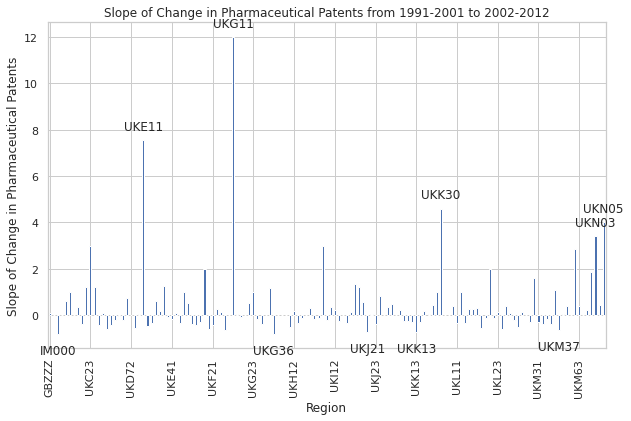

In [393]:
# # Plot the change in the number of patents for each region
# change_in_patents.plot(kind='bar', figsize=(10, 6))
# plt.xlabel('Region')
# plt.ylabel('Slope of Change in Pharmaceutical Patents')
# plt.title('Slope of Change in Pharmaceutical Patents from 1991-2001 to 2002-2012')

# xticks = plt.xticks()[0]
# n = 10 
# xticks = xticks[::n]
# plt.xticks(xticks)
# # Label the top 5 and bottom 5 changes
# top5_changes = change_in_patents.nlargest(5)
# bottom5_changes = change_in_patents.nsmallest(5)
# x_positions_top = [change_in_patents.index.get_loc(i) for i in top5_changes.index]
# x_positions_bottom = [change_in_patents.index.get_loc(i) for i in bottom5_changes.index]
# for i in range(len(top5_changes)):
#     plt.annotate(top5_changes.index[i], (x_positions_top[i], top5_changes.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
# for i in range(len(bottom5_changes)):
#     plt.annotate(bottom5_changes.index[i], (x_positions_bottom[i], bottom5_changes.iloc[i]), textcoords="offset points", xytext=(0,-20), ha='center')
# plt.savefig('window_slope.png', dpi=300, bbox_inches='tight')

# plt.show()

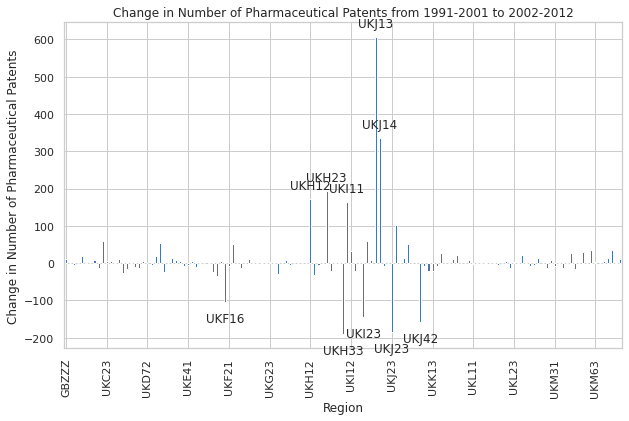

In [394]:
# # Plot the change in the number of patents for each region
# change_in_patents_new.plot(kind='bar', figsize=(10, 6))
# plt.xlabel('Region')
# plt.ylabel('Change in Number of Pharmaceutical Patents')
# plt.title('Change in Number of Pharmaceutical Patents from 1991-2001 to 2002-2012')

# xticks = plt.xticks()[0]
# n = 10 
# xticks = xticks[::n]
# plt.xticks(xticks)
# # Label the top 5 and bottom 5 changes
# top5_changes = change_in_patents_new.nlargest(5)
# bottom5_changes = change_in_patents_new.nsmallest(5)
# x_positions_top = [change_in_patents_new.index.get_loc(i) for i in top5_changes.index]
# x_positions_bottom = [change_in_patents_new.index.get_loc(i) for i in bottom5_changes.index]
# for i in range(len(top5_changes)):
#     plt.annotate(top5_changes.index[i], (x_positions_top[i], top5_changes.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
# for i in range(len(bottom5_changes)):
#     plt.annotate(bottom5_changes.index[i], (x_positions_bottom[i], bottom5_changes.iloc[i]), textcoords="offset points", xytext=(0,-20), ha='center')

# plt.savefig('window_number.png', dpi=300, bbox_inches='tight')
# plt.show()

In [195]:
# change_in_patents

reg_code
GBZZZ    0.083969
GY000         NaN
IM000   -0.800000
JE000         NaN
UKC11    0.606061
           ...   
UKN01    0.240000
UKN02    1.875000
UKN03    3.400000
UKN04    0.444444
UKN05    4.000000
Name: app_nbr, Length: 137, dtype: float64

In [308]:
# incubator_gdf_new = incubator_gdf.merge(gdf[['NUTS_ID','geometry']], on='NUTS_ID', how='left')

In [351]:
# incubator_gdf_new = gpd.GeoDataFrame(incubator_gdf_new, geometry='geometry_x', crs="EPSG:4326")
# incubator_gdf_new = incubator_gdf_new.to_crs(uk_gdf.crs)

### If incubator increase patents?

In [437]:
pharma_patents_region = df_da.groupby('reg_code')['app_nbr'].count()
# Compute the total number of patents for each region
total_patents_region = inv.groupby('reg_code')['app_nbr'].count()
perc_pharma_region = pharma_patents_region / total_patents_region

In [439]:
perc_pharma_region_df = perc_pharma_region.reset_index()

In [440]:
new_pharma_patents_region_df = pd.DataFrame(columns=perc_pharma_region_df.columns)

for idx, row in perc_pharma_region_df.iterrows():
    if row['reg_code'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code'] = new_code
            new_pharma_patents_region_df = new_pharma_patents_region_df.append(new_row)
    else:
        new_pharma_patents_region_df = new_pharma_patents_region_df.append(row)
new_pharma_patents_region_df = new_pharma_patents_region_df.reset_index(drop=True)
new_pharma_patents_region_df.head()

reg_code   app_nbr
0    GBZZZ  0.141887
1    GY000  0.041096
2    IM000  0.027668
3    JE000  0.016667
4    UKC11  0.178191

In [441]:
new_pharma_patents_region_df.columns = ['reg_code', 'percentage']

In [442]:
pharma_gdf = new_pharma_patents_region_df.merge(gdf[['NUTS_ID','geometry']], left_on='reg_code', right_on='NUTS_ID', how='left')
pharma_gdf.head()

reg_code  percentage NUTS_ID  \
0    GBZZZ    0.141887     NaN   
1    GY000    0.041096     NaN   
2    IM000    0.027668     NaN   
3    JE000    0.016667     NaN   
4    UKC11    0.178191   UKC11   

                                            geometry  
0                                               None  
1                                               None  
2                                               None  
3                                               None  
4  POLYGON ((3598172.586 3553993.879, 3597951.864...

In [443]:
pharma_gdf = pharma_gdf.dropna(subset=['NUTS_ID'])

In [444]:
pharma_gdf['contains_incubator'] = pharma_gdf['NUTS_ID'].isin(incubator_gdf_new['NUTS_ID'])
pharma_gdf

reg_code  percentage NUTS_ID  \
4      UKC11    0.178191   UKC11   
5      UKC12    0.073227   UKC12   
6      UKC13    0.060606   UKC13   
7      UKC14    0.075786   UKC14   
8      UKC21    0.079762   UKC21   
..       ...         ...     ...   
168    UKM63    0.166667   UKM63   
169    UKM64    0.166667   UKM64   
170    UKM65         NaN   UKM65   
171    UKM66         NaN   UKM66   
172    UKN06    0.188525   UKN06   

                                              geometry  contains_incubator  
4    POLYGON ((3598172.586 3553993.879, 3597951.864...               False  
5    POLYGON ((3625708.122 3546887.147, 3616038.678...               False  
6    POLYGON ((3585028.631 3557236.128, 3583327.063...               False  
7    POLYGON ((3582515.806 3590052.703, 3587447.069...               False  
8    POLYGON ((3592155.267 3610215.783, 3576388.523...               False  
..                                                 ...                 ...  
168  MULTIPOLYGON (((3395470.469 3908044.542, 34205...               False  
169  MULTIPOLYGON (((3356830.728 3985850.486, 33196...               False  
170  MULTIPOLYGON (((3610147.416 4075577.330, 36050...               False  
171  MULTIPOLYGON (((3719949.684 4210679.922, 37093...               False  
172  POLYGON ((3308817.148 3612506.132, 3297551.752...               False  

[168 rows x 5 columns]

In [445]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Convert the 'contains_incubator' column to an integer type
pharma_gdf['contains_incubator'] = pharma_gdf['contains_incubator'].astype(int)

In [446]:
pharma_gdf

reg_code  percentage NUTS_ID  \
4      UKC11    0.178191   UKC11   
5      UKC12    0.073227   UKC12   
6      UKC13    0.060606   UKC13   
7      UKC14    0.075786   UKC14   
8      UKC21    0.079762   UKC21   
..       ...         ...     ...   
168    UKM63    0.166667   UKM63   
169    UKM64    0.166667   UKM64   
170    UKM65         NaN   UKM65   
171    UKM66         NaN   UKM66   
172    UKN06    0.188525   UKN06   

                                              geometry  contains_incubator  
4    POLYGON ((3598172.586 3553993.879, 3597951.864...                   0  
5    POLYGON ((3625708.122 3546887.147, 3616038.678...                   0  
6    POLYGON ((3585028.631 3557236.128, 3583327.063...                   0  
7    POLYGON ((3582515.806 3590052.703, 3587447.069...                   0  
8    POLYGON ((3592155.267 3610215.783, 3576388.523...                   0  
..                                                 ...                 ...  
168  MULTIPOLYGON (((3395470.469 3908044.542, 34205...                   0  
169  MULTIPOLYGON (((3356830.728 3985850.486, 33196...                   0  
170  MULTIPOLYGON (((3610147.416 4075577.330, 36050...                   0  
171  MULTIPOLYGON (((3719949.684 4210679.922, 37093...                   0  
172  POLYGON ((3308817.148 3612506.132, 3297551.752...                   0  

[168 rows x 5 columns]

In [447]:
pharma_gdf['percentage']= pd.to_numeric(pharma_gdf['percentage'], errors='coerce')
pharma_gdf['percentage'].dtype

dtype('float64')

In [448]:
# Define the regression formula
formula = 'percentage ~ contains_incubator'

# Create the ordinary least squares model
model = smf.ols(formula=formula, data=pharma_gdf)

# Fit the model
results_pharma = model.fit()

# Print the summary statistics of the regression model
print(results_pharma.summary())

                            OLS Regression Results                            
Dep. Variable:             percentage   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     21.16
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           8.48e-06
Time:                        22:25:37   Log-Likelihood:                 154.01
No. Observations:                 164   AIC:                            -304.0
Df Residuals:                     162   BIC:                            -297.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1164      0

### Spatial Autocorrelation: Global Moran's I

In [196]:
change_in_patents_df = pd.DataFrame(change_in_patents).reset_index()
change_in_patents_df.head()

reg_code   app_nbr
0    GBZZZ  0.083969
1    GY000       NaN
2    IM000 -0.800000
3    JE000       NaN
4    UKC11  0.606061

In [197]:
new_change = pd.DataFrame(columns=change_in_patents_df.columns)

for idx, row in change_in_patents_df.iterrows():
    if row['reg_code'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code'] = new_code
            new_change = new_change.append(new_row)
    else:
        new_change = new_change.append(row)
new_change = new_change.reset_index(drop=True)
new_change.columns = ['reg_code','change']
new_change.head()

reg_code    change
0    GBZZZ  0.083969
1    GY000       NaN
2    IM000 -0.800000
3    JE000       NaN
4    UKC11  0.606061

In [198]:
new_change.to_csv('Change_New.csv', index = False)

In [200]:
change_gdf = new_change.merge(gdf, left_on='reg_code', right_on='NUTS_ID', how='left')
change_gdf.head()

reg_code    change NUTS_ID  LEVL_CODE CNTR_CODE  \
0    GBZZZ  0.083969     NaN        NaN       NaN   
1    GY000       NaN     NaN        NaN       NaN   
2    IM000 -0.800000     NaN        NaN       NaN   
3    JE000       NaN     NaN        NaN       NaN   
4    UKC11  0.606061   UKC11        3.0        UK   

                         NAME_LATN                        NUTS_NAME  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4  Hartlepool and Stockton-on-Tees  Hartlepool and Stockton-on-Tees   

   MOUNT_TYPE  URBN_TYPE  COAST_TYPE    FID  \
0         NaN        NaN         NaN    NaN   
1         NaN        NaN         NaN    NaN   
2         NaN        NaN         NaN    NaN   
3         NaN        NaN         NaN    NaN   
4         4.0        1.0         1.0  UKC11   

                                            geometry  
0                                               None  
1                                               None  
2                                               None  
3                                               None  
4  POLYGON ((3598172.586 3553993.879, 3597951.864...

In [201]:
print(change_gdf['NUTS_ID'].isna().sum())

8


In [202]:
change_gdf = change_gdf.dropna(subset=['geometry'])


In [203]:
print(change_gdf['NUTS_ID'].isna().sum())

0


In [204]:
print(change_gdf['change'].isna().sum())

8


In [205]:
change_gdf = change_gdf.dropna(subset=['change'])

In [206]:
change_gdf = gpd.GeoDataFrame(change_gdf, geometry='geometry')

In [207]:
import pysal.lib as ps

w = ps.weights.Queen.from_dataframe(change_gdf)

In [209]:
from pysal.explore import esda
moran = esda.Moran(change_gdf['change'], w)

print('Moran\'s I: ', moran.I)

#### low, but positive, spatial autocorrelation, regions with similar values tend to be located near each other more often than that would be expected if the data were randomly distributed, but the correlation is not very strong

### Location Quotient

In [65]:
inv = inv[['app_nbr','reg_code','prio_year']]
inv = inv.drop_duplicates()
inv.head()

app_nbr reg_code  prio_year
0  EP19780100247    UKK30       1977
1  EP19780100395    UKJ42       1977
3  EP19780100400    UKH33       1977
4  EP19780100463    UKJ42       1977
6  EP19780100492    UKJ22       1977

In [66]:
# Compute the number of pharmaceutical patents for each region
pharma_patents_region = df_da.groupby('reg_code')['app_nbr'].count()

# Compute the total number of patents for each region
total_patents_region = inv.groupby('reg_code')['app_nbr'].count()

# Compute the number of pharmaceutical patents for the UK
pharma_patents_UK = df_da['app_nbr'].count()

# Compute the total number of patents for the UK
total_patents_UK = inv['app_nbr'].count()


In [67]:
# Compute the percentage of pharmaceutical patents to all patents in each region
perc_pharma_region = pharma_patents_region / total_patents_region

# Compute the percentage of pharmaceutical patents to all patents in the UK
perc_pharma_UK = pharma_patents_UK / total_patents_UK

# Compute the location quotient for each region
LQ = perc_pharma_region / perc_pharma_UK
LQ

reg_code
GBZZZ    0.878837
GY000    0.254545
IM000    0.171373
JE000    0.103232
UKC11    1.103704
           ...   
UKN01    1.167707
UKN02    0.714683
UKN03    1.183392
UKN04    0.895507
UKN05    0.553029
Name: app_nbr, Length: 143, dtype: float64

In [68]:
# Check for NaN values
nan_rows = LQ[LQ.isna()]
nan_rows

reg_code
UKD41   NaN
UKD42   NaN
UKM32   NaN
UKM65   NaN
UKM66   NaN
Name: app_nbr, dtype: float64

In [69]:
LQ = LQ.dropna()
len(LQ)

138

In [70]:
LQ_df = pd.DataFrame(LQ)
LQ_df = LQ_df.reset_index()
LQ_df.head()

reg_code   app_nbr
0    GBZZZ  0.878837
1    GY000  0.254545
2    IM000  0.171373
3    JE000  0.103232
4    UKC11  1.103704

In [71]:
print(LQ_df['reg_code'].isna().sum())

0


Old: New:
UKK21: UKK24;
UKK22: UKK25;
UKM21: UKM71;
UKM22: UKM72;
UKM23: UKM73;
UKM25: UKM75;
UKM26: UKM76;
UKM27: UKM77;
UKM28: UKM78;
UKM31: UKM81;
UKM34: UKM82;
UKM35: UKM83;
UKM36: UKM84;
UKM24: UKM91;
UKM33: UKM93;
UKM37: UKM94;
UKM38: UKM95;
UKN01: UKN06;
UKD31: UKD33, UKD34, UKD35;
UKD32: UKD36, UKD37;
UKD43: UKD44, UKD45, UKD46, UKD47;
UKH13: UKH15, UKH16, UKH17;
UKH33: UKH34, UKH35, UKH36, UKH37;
UKI11: UKI31, UKI32, UKI33, UKI34;
UKI12: UKI41, UKI42, UKI43, UKI44, UKI45;
UKI21: UKI51, UKI52, UKI53, UKI54;
UKI22: UKI61, UKI62, UKI63;
UKI23: UKI71, UKI72, UKI73, UKI74, UKI75;
UKJ23: UKJ25, UKJ26;
UKJ24: UKJ27, UKJ28;
UKJ33: UKJ35, UKJ36, UKJ37;
UKJ42: UKJ43, UKJ44, UKJ45, UKJ46;
0--3, 134--137；
GBZZZ	EXTRA-REGIO NUTS 3 (United Kingdom)
UKN02 -- UKN05: discontinued

In [72]:
new_df = pd.DataFrame(columns=LQ_df.columns)

for idx, row in LQ_df.iterrows():
    if row['reg_code'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code'] = new_code
            new_df = new_df.append(new_row)
    else:
        new_df = new_df.append(row)
new_df = new_df.reset_index(drop=True)
new_df.head()

reg_code   app_nbr
0    GBZZZ  0.878837
1    GY000  0.254545
2    IM000  0.171373
3    JE000  0.103232
4    UKC11  1.103704

In [73]:
new_df.columns=['reg_code', 'LQ']

In [112]:
LQ_gdf = new_df.merge(gdf, left_on='reg_code', right_on='NUTS_ID', how='left')
LQ_gdf.head()

reg_code        LQ NUTS_ID  LEVL_CODE CNTR_CODE  \
0    GBZZZ  0.878837     NaN        NaN       NaN   
1    GY000  0.254545     NaN        NaN       NaN   
2    IM000  0.171373     NaN        NaN       NaN   
3    JE000  0.103232     NaN        NaN       NaN   
4    UKC11  1.103704   UKC11        3.0        UK   

                         NAME_LATN                        NUTS_NAME  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4  Hartlepool and Stockton-on-Tees  Hartlepool and Stockton-on-Tees   

   MOUNT_TYPE  URBN_TYPE  COAST_TYPE    FID  \
0         NaN        NaN         NaN    NaN   
1         NaN        NaN         NaN    NaN   
2         NaN        NaN         NaN    NaN   
3         NaN        NaN         NaN    NaN   
4         4.0        1.0         1.0  UKC11   

                                            geometry  
0                                               None  
1                                               None  
2                                               None  
3                                               None  
4  POLYGON ((3598172.586 3553993.879, 3597951.864...

In [75]:
print(LQ_gdf['NUTS_ID'].isna().sum())

8


In [76]:
len(LQ_gdf)

172

In [62]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches

In [312]:
# # Create a new column in uk_gdf that indicates whether each region contains an incubator
# # uk_gdf['contains_incubator'] = uk_gdf['NUTS_ID'].isin(incubator_gdf_new['NUTS_ID'])
# LQ_gdf['contains_incubator'] = LQ_gdf['NUTS_ID'].isin(incubator_gdf_new['NUTS_ID'])

# # Set the edge color based on the 'contains_incubator' column
# edgecolor = LQ_gdf['contains_incubator'].map({True: 'blue', False: 'white'})

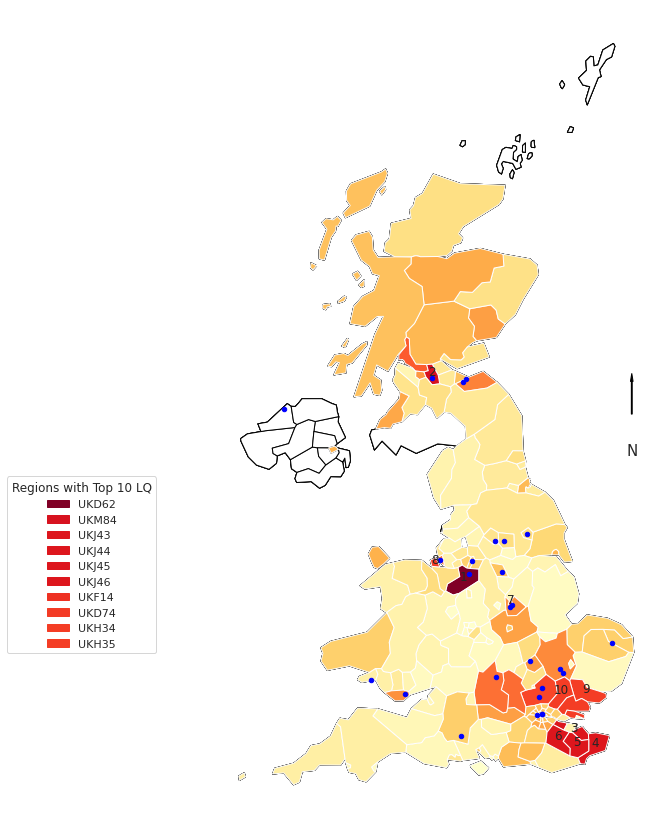

In [99]:
LQ_gdf = gpd.GeoDataFrame(LQ_gdf, geometry='geometry')
LQ_gdf = LQ_gdf.to_crs(uk_gdf.crs)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

base = uk_gdf.plot(ax=ax, color='white', edgecolor = "black")
LQ_gdf.plot(ax=base, column='LQ', cmap='YlOrRd')
incubator_gdf.plot(ax=ax, color='blue', markersize=20)
leg = ax.get_legend()
# # Rank the regions based on 'LQ' and keep only the top 10
# LQ_gdf['rank'] = LQ_gdf['LQ'].rank(method='dense', ascending=False)
# top10 = LQ_gdf[LQ_gdf['rank'] <= 10]

top10 = LQ_gdf.nlargest(10, 'LQ')
top10_colors = top10['LQ']
cmap = plt.get_cmap('YlOrRd')
vmin = LQ_gdf['LQ'].min()
vmax = LQ_gdf['LQ'].max()
legend_elements = []

# Add top 10 regions to the legend and add labels to the map
for i, (idx, row) in enumerate(top10.iterrows()):
    color = cmap((row['LQ'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_ID'])
    legend_elements.append(patch)
    
    # Add labels to the map
    ax.annotate(text=str(i+1), xy=row['geometry'].centroid.coords[0], ha='center')

ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 LQ')

# Add a north arrow
arrow = mpatches.Arrow(0.95, 0.5, 0, 0.05, width=0.01, transform=ax.transAxes, color='black')
ax.add_patch(arrow)
ax.text(0.95, 0.45, 'N', transform=ax.transAxes, ha='center', fontsize=15)

# Remove grid and axes
ax.grid(False)
ax.axis('off')

plt.savefig('LQ_map.png', dpi=300, bbox_inches='tight')
plt.show()

### Spatial Autocorrelation on LQ

In [116]:
LQ_gdf = LQ_gdf.dropna(subset=['NUTS_ID'])

In [117]:
import pysal.lib as ps

w = ps.weights.Queen.from_dataframe(LQ_gdf)

In [119]:
from pysal.explore import esda
moran = esda.Moran(LQ_gdf['LQ'], w)

print('Moran\'s I: ', moran.I)

('WARNING: ', 113, ' is an island (no neighbors)')
('WARNING: ', 131, ' is an island (no neighbors)')
('WARNING: ', 162, ' is an island (no neighbors)')
('WARNING: ', 163, ' is an island (no neighbors)')
Moran's I:  0.2868595798612299


### UKD62

In [88]:
region1 = df_da[df_da['reg_code'] == 'UKD62']
reg1_incu = incubator_gdf[incubator_gdf['NUTS_ID'] == 'UKD62']
print(region1.head())
print(reg1_incu)

           app_nbr reg_code  prio_year
174  EP19780300153    UKD62       1977
265  EP19780300456    UKD62       1977
337  EP19780300716    UKD62       1977
339  EP19780300718    UKD62       1977
373  EP19780300756    UKD62       1977
                 Incubator  Postcode  Start Year   latitude  longitude  \
17  BioHub (Alderley Park)  SK10 4TG        2014  53.277552  -2.230068   

                           geometry  index_right NUTS_ID  
17  POINT (3509587.139 3420787.622)         1876   UKD62  


In [90]:
region1_count = region1.groupby('prio_year')['app_nbr'].count()
region1_count = region1_count.reset_index()
region1_count.columns = ['prio_year','count']
region1_count.head()

prio_year  count
0       1977      5
1       1978      4
2       1979      1
3       1980      4
4       1981      9

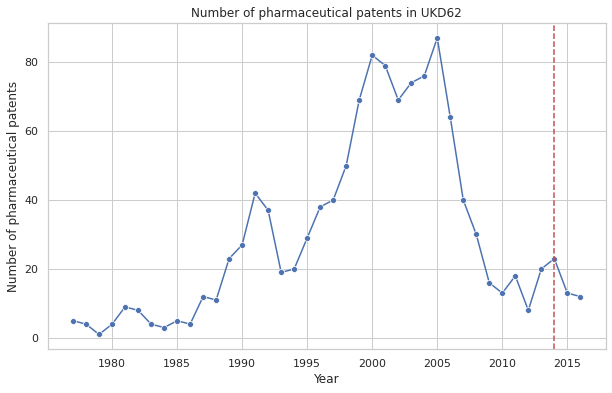

In [91]:
# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=region1_count['prio_year'], y=region1_count['count'], marker='o', ax=ax)

for year in reg1_incu['Start Year']:
    ax.axvline(x=year, color='r', linestyle='--')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of pharmaceutical patents')
ax.set_title('Number of pharmaceutical patents in UKD62')
plt.savefig('UKD62.png', dpi=300, bbox_inches='tight')
plt.show()



In [107]:
reg1_firm = app[app['app_nbr'].isin(region1['app_nbr'])]
reg1_firm_count = reg1_firm.groupby('app_name')['app_nbr'].count()
reg1_firm_count = reg1_firm_count.reset_index()
reg1_firm_count.columns = ['Name','count']
reg1_firm_count.sort_values(by='count', ascending=False)

Name  count
73                    zeneca limited    134
31  imperial chemical industries plc     84
6             astrazeneca uk limited     24
47                 neutec pharma plc     14
40                 medimmune limited     13
..                               ...    ...
36              m l laboratories plc      1
38       matrix therapeutics limited      1
39          medical research council      1
41                 medlmmune limited      1
37                mast group limited      1

[74 rows x 2 columns]

In [121]:
print("zeneca and astrazeneca uk: " + str((134+24)/len(region1['app_nbr'].unique())))

zeneca and astrazeneca uk: 0.132996632996633


### UKM84: UKM36 (OLD)

In [94]:
region2 = df_da[df_da['reg_code'] == 'UKM36']
reg2_incu = incubator_gdf[incubator_gdf['NUTS_ID'] == 'UKM84']
print(region2.head())
print(reg2_incu)

            app_nbr reg_code  prio_year
1467  EP19800200014    UKM36       1979
1599  EP19800300565    UKM36       1979
6387  EP19830306310    UKM36       1982
7096  EP19840201634    UKM36       1983
7844  EP19840304931    UKM36       1983
           Incubator Postcode  Start Year   latitude  longitude  \
15  BioCity Scotland  ML1 5UH        2011  55.835413  -3.956226   

                           geometry  index_right NUTS_ID  
15  POINT (3452374.103 3721465.268)         1824   UKM84  


In [95]:
region2_count = region2.groupby('prio_year')['app_nbr'].count()
region2_count = region2_count.reset_index()
region2_count.columns = ['prio_year','count']
region2_count.head()

prio_year  count
0       1979      2
1       1982      2
2       1983      2
3       1986      1
4       1989      1

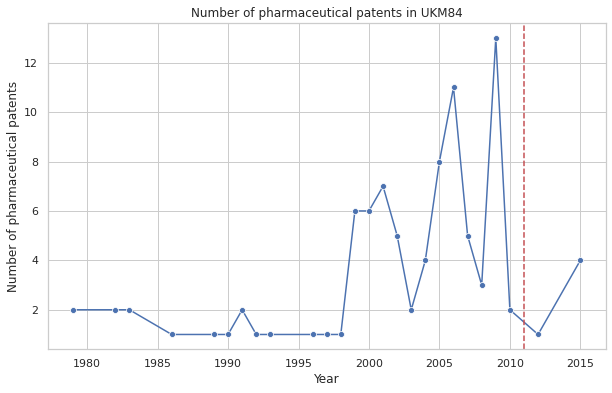

In [96]:
# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=region2_count['prio_year'], y=region2_count['count'], marker='o', ax=ax)

for year in reg2_incu['Start Year']:
    ax.axvline(x=year, color='r', linestyle='--')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of pharmaceutical patents')
ax.set_title('Number of pharmaceutical patents in UKM84')
plt.savefig('UKM84.png', dpi=300, bbox_inches='tight')
plt.show()



In [108]:
reg2_firm = app[app['app_nbr'].isin(region2['app_nbr'])]
reg2_firm_count = reg2_firm.groupby('app_name')['app_nbr'].count()
reg2_firm_count = reg2_firm_count.reset_index()
reg2_firm_count.columns = ['Name','count']
reg2_firm_count.sort_values(by='count', ascending=False)

Name  count
3                 lamellar biomedical limited      5
8                              pfizer limited      4
1            imperial chemical industries plc      2
2                     isis innovation limited      2
6   national research development corporation      2
10                   virttu biologics limited      2
0                                  fisons plc      1
4                             mironid limited      1
5                               mw encap ltd.      1
7        oxford university innovation limited      1
9                           pisacane, anthony      1

In [109]:
print("Lamellar biomedical limited: " + str(5/len(region2['app_nbr'].unique())))

Lamellar biomedical limited: 0.053763440860215055


### More incubator

In [137]:
incubator_gdf.groupby('NUTS_ID')['Incubator'].count().sort_values(ascending=False)

NUTS_ID
UKH23    2
UKI31    2
UKM73    2
UKF16    2
UKH12    2
UKM84    1
UKL22    1
UKL18    1
UKK15    1
UKJ14    1
UKI33    1
UKD33    1
UKH24    1
UKD62    1
UKH17    1
UKE42    1
UKE41    1
UKE32    1
UKE21    1
UKD72    1
UKN0A    1
Name: Incubator, dtype: int64

### UKH23

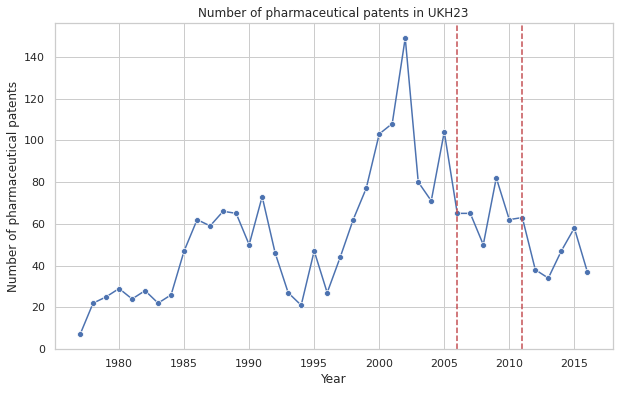

In [139]:
region3 = df_da[df_da['reg_code'] == 'UKH23']
reg3_incu = incubator_gdf[incubator_gdf['NUTS_ID'] == 'UKH23']
# print(region3.head())
# print(reg3_incu)
region3_count = region3.groupby('prio_year')['app_nbr'].count()
region3_count = region3_count.reset_index()
region3_count.columns = ['prio_year','count']
# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=region3_count['prio_year'], y=region3_count['count'], marker='o', ax=ax)

for year in reg3_incu['Start Year']:
    ax.axvline(x=year, color='r', linestyle='--')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of pharmaceutical patents')
ax.set_title('Number of pharmaceutical patents in UKH23')
plt.savefig('UKH23.png', dpi=300, bbox_inches='tight')
plt.show()

### UKI31

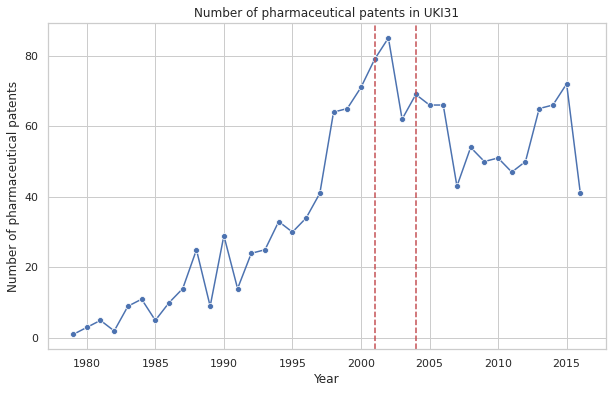

In [141]:
region4 = df_da[df_da['reg_code'] == 'UKI11']
reg4_incu = incubator_gdf[incubator_gdf['NUTS_ID'] == 'UKI31']
# print(region3.head())
# print(reg3_incu)
region4_count = region4.groupby('prio_year')['app_nbr'].count()
region4_count = region4_count.reset_index()
region4_count.columns = ['prio_year','count']
# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=region4_count['prio_year'], y=region4_count['count'], marker='o', ax=ax)

for year in reg4_incu['Start Year']:
    ax.axvline(x=year, color='r', linestyle='--')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of pharmaceutical patents')
ax.set_title('Number of pharmaceutical patents in UKI31')
plt.savefig('UKI31.png', dpi=300, bbox_inches='tight')
plt.show()

### UKM73

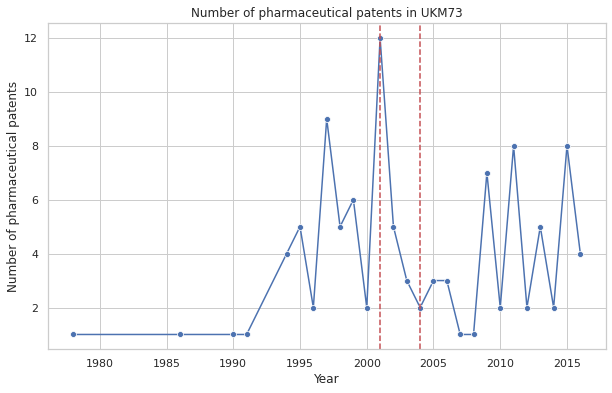

In [143]:
region5 = df_da[df_da['reg_code'] == 'UKM23']
reg5_incu = incubator_gdf[incubator_gdf['NUTS_ID'] == 'UKM73']
# print(region3.head())
# print(reg3_incu)
region5_count = region5.groupby('prio_year')['app_nbr'].count()
region5_count = region5_count.reset_index()
region5_count.columns = ['prio_year','count']
# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=region5_count['prio_year'], y=region5_count['count'], marker='o', ax=ax)

for year in reg4_incu['Start Year']:
    ax.axvline(x=year, color='r', linestyle='--')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of pharmaceutical patents')
ax.set_title('Number of pharmaceutical patents in UKM73')
plt.savefig('UKM73.png', dpi=300, bbox_inches='tight')
plt.show()

### UKF16

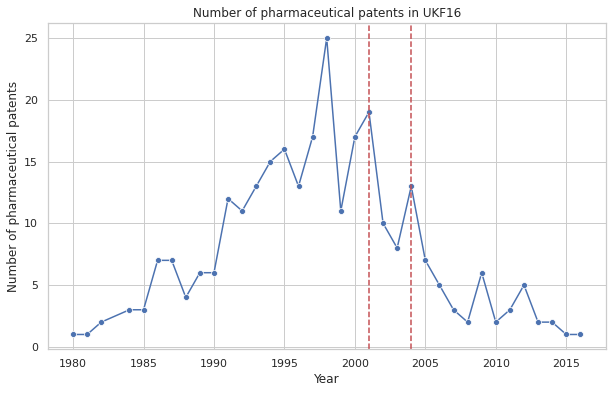

In [144]:
region6 = df_da[df_da['reg_code'] == 'UKF16']
reg6_incu = incubator_gdf[incubator_gdf['NUTS_ID'] == 'UKF16']
# print(region3.head())
# print(reg3_incu)
region6_count = region6.groupby('prio_year')['app_nbr'].count()
region6_count = region6_count.reset_index()
region6_count.columns = ['prio_year','count']
# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=region6_count['prio_year'], y=region6_count['count'], marker='o', ax=ax)

for year in reg4_incu['Start Year']:
    ax.axvline(x=year, color='r', linestyle='--')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of pharmaceutical patents')
ax.set_title('Number of pharmaceutical patents in UKF16')
plt.savefig('UKF16.png', dpi=300, bbox_inches='tight')
plt.show()

### UKH12

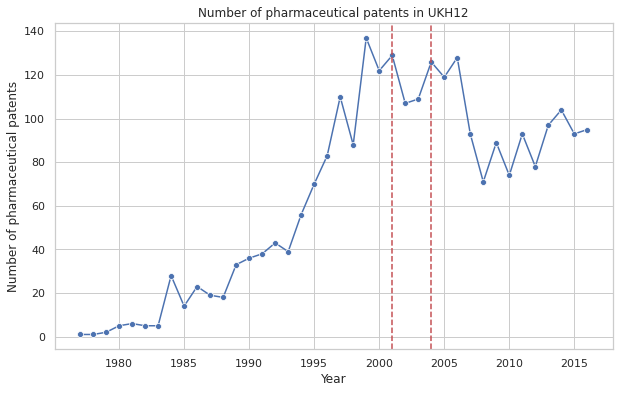

In [145]:
region7 = df_da[df_da['reg_code'] == 'UKH12']
reg7_incu = incubator_gdf[incubator_gdf['NUTS_ID'] == 'UKH12']
# print(region3.head())
# print(reg3_incu)
region7_count = region7.groupby('prio_year')['app_nbr'].count()
region7_count = region7_count.reset_index()
region7_count.columns = ['prio_year','count']
# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=region7_count['prio_year'], y=region7_count['count'], marker='o', ax=ax)

for year in reg4_incu['Start Year']:
    ax.axvline(x=year, color='r', linestyle='--')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of pharmaceutical patents')
ax.set_title('Number of pharmaceutical patents in UKH12')
plt.savefig('UKH12.png', dpi=300, bbox_inches='tight')
plt.show()

### Companies

select top companies,and plot them along with their branches, see any most productive branches

In [54]:
patent_firm = app.groupby('app_name')['app_nbr'].count()

In [55]:
top_firm = patent_firm.sort_values( ascending=False)[0:10]
top_firm

app_name
glaxo group limited                 1319
unilever plc                        1098
smithkline beecham plc               947
beecham group plc                    695
pfizer limited                       661
imperial chemical industries plc     620
zeneca limited                       375
medical research council             366
merck sharp & dohme ltd.             344
the wellcome foundation limited      267
Name: app_nbr, dtype: int64

### Glaxo
SmithKline Beecham plc was a British pharmaceutical company, which was formed by the merger of Beecham Group plc and SmithKline Beckman Corporation in 1989.
The merger of these two companies in 1989 created SmithKline Beecham plc, which was a major player in the global pharmaceutical industry. In 2000, SmithKline Beecham merged with another pharmaceutical company, Glaxo Wellcome, to form GlaxoSmithKline (GSK), one of the world's largest pharmaceutical companies.

In [56]:
gl = app[app['app_name']=='glaxo group limited']

gl['app_name'].unique()

array(['glaxo group limited'], dtype=object)

In [57]:
glsm = app[app['app_name'].str.contains('glaxosmithkline', case=False, na=False)]

glsm['app_name'].unique()

array(['glaxosmithkline intellectual property development limited',
       'glaxosmithkline',
       'glaxosmithkline consumer healthcare (uk) ip limited',
       'glaxosmithkline intellectual property management limited',
       'glaxosmithkline intellectual property (no. 2) limited',
       'glaxosmithkline intellectual property (no.2) limited',
       'glaxosmithkline intellectual property limited',
       'glaxosmithkline intellectual property development ltd'],
      dtype=object)

In [58]:
beech = app[app['app_name'].str.contains('beecham group', case=False, na=False)]
beech['app_name'].unique()

array(['beecham group plc', 'beecham group p.l.c.'], dtype=object)

In [59]:
smith = app[app['app_name'].str.contains('smithkline beecham', case=False, na=False)]
smith['app_name'].unique()

array(['smithkline beecham plc', 'smithkline beecham limited',
       'smithkline beecham p.l.c.', 'smithkline beecham'], dtype=object)

In [60]:
gl_branches = df[df['app_nbr'].isin(gl['app_nbr'])]

gl_branches = gl_branches.drop_duplicates(subset = ['app_nbr','reg_code'])
gl_branches_year = gl_branches.groupby('prio_year')['app_nbr'].count()
gl_branches_year=gl_branches_year.reset_index()
gl_branches_year.columns=['prio_year','count']

In [61]:
glsm_branches = df[df['app_nbr'].isin(glsm['app_nbr'])]

glsm_branches = glsm_branches.drop_duplicates(subset = ['app_nbr','reg_code'])
glsm_branches_year = glsm_branches.groupby('prio_year')['app_nbr'].count()
glsm_branches_year=glsm_branches_year.reset_index()
glsm_branches_year.columns=['prio_year','count']

In [62]:
beech_branches = df[df['app_nbr'].isin(beech['app_nbr'])]

beech_branches = beech_branches.drop_duplicates(subset = ['app_nbr','reg_code'])
beech_branches_year = beech_branches.groupby('prio_year')['app_nbr'].count()
beech_branches_year=beech_branches_year.reset_index()
beech_branches_year.columns=['prio_year','count']

In [63]:
smith_branches = df[df['app_nbr'].isin(smith['app_nbr'])]

smith_branches = smith_branches.drop_duplicates(subset = ['app_nbr','reg_code'])
smith_branches_year = smith_branches.groupby('prio_year')['app_nbr'].count()
smith_branches_year=smith_branches_year.reset_index()
smith_branches_year.columns=['prio_year','count']

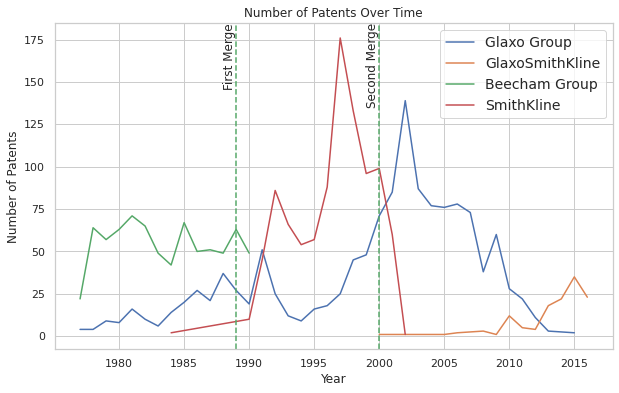

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(gl_branches_year['prio_year'], gl_branches_year['count'], label='Glaxo Group')
plt.plot(glsm_branches_year['prio_year'], glsm_branches_year['count'], label='GlaxoSmithKline')
plt.plot(beech_branches_year['prio_year'], beech_branches_year['count'], label='Beecham Group')
plt.plot(smith_branches_year['prio_year'], smith_branches_year['count'], label='SmithKline')

plt.axvline(x=1989, color='g', linestyle='--')
plt.text(1989, plt.gca().get_ylim()[1], 'First Merge', ha='right', va='top', rotation=90)
plt.axvline(x=2000, color='g', linestyle='--')
plt.text(2000, plt.gca().get_ylim()[1], 'Second Merge', ha='right', va='top', rotation=90)

plt.legend(fontsize=14)

plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.title('Number of Patents Over Time')
plt.savefig('glaxo.png', dpi=300 , bbox_inches='tight')
plt.show()

In [66]:
gl_branches_year = pd.merge(gl_branches_year, results_df_T[['prio_year','pharma_patents']], on = 'prio_year',how='left')

In [67]:
glsm_branches_year = pd.merge(glsm_branches_year, results_df_T[['prio_year','pharma_patents']], on = 'prio_year',how='left')

In [68]:
beech_branches_year = pd.merge(beech_branches_year, results_df_T[['prio_year','pharma_patents']], on = 'prio_year',how='left')

In [69]:
smith_branches_year = pd.merge(smith_branches_year, results_df_T[['prio_year','pharma_patents']], on = 'prio_year',how='left')

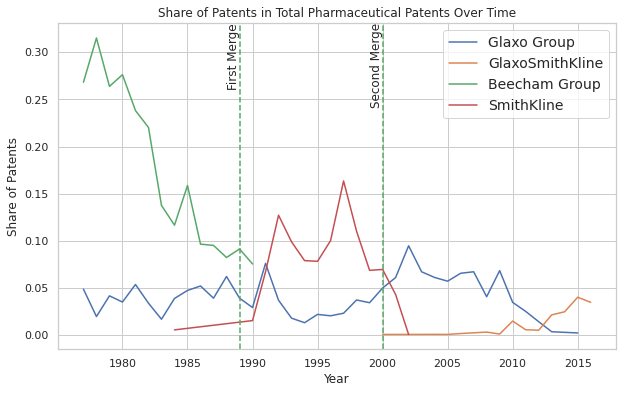

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(gl_branches_year['prio_year'], gl_branches_year['count']/gl_branches_year['pharma_patents'], label='Glaxo Group')
plt.plot(glsm_branches_year['prio_year'], glsm_branches_year['count']/glsm_branches_year['pharma_patents'], label='GlaxoSmithKline')
plt.plot(beech_branches_year['prio_year'], beech_branches_year['count']/beech_branches_year['pharma_patents'], label='Beecham Group')
plt.plot(smith_branches_year['prio_year'], smith_branches_year['count']/smith_branches_year['pharma_patents'], label='SmithKline')

plt.axvline(x=1989, color='g', linestyle='--')
plt.text(1989, plt.gca().get_ylim()[1], 'First Merge', ha='right', va='top', rotation=90)
plt.axvline(x=2000, color='g', linestyle='--')
plt.text(2000, plt.gca().get_ylim()[1], 'Second Merge', ha='right', va='top', rotation=90)

plt.legend(fontsize=14)

plt.xlabel('Year')
plt.ylabel('Share of Patents')
plt.title('Share of Patents in Total Pharmaceutical Patents Over Time')
plt.savefig('glaxo_share.png', dpi=300 , bbox_inches='tight')
plt.show()

In [59]:
combined_gl = pd.concat([gl_branches, glsm_branches, beech_branches, smith_branches])
combined_gl.reset_index(drop=True, inplace=True)
# print(combined_gl.head())
combined_gl_reg_old = combined_gl.groupby('reg_code')['app_nbr'].count()
combined_gl_reg_old = combined_gl_reg_old.reset_index()
combined_gl_reg_old.columns = ['reg_code','count']
combined_gl_reg= pd.DataFrame(columns=combined_gl_reg_old.columns)
for idx, row in combined_gl_reg_old.iterrows():
    if row['reg_code'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code'] = new_code
            combined_gl_reg = combined_gl_reg.append(new_row)
    else:
        combined_gl_reg = combined_gl_reg.append(row)
combined_gl_reg = combined_gl_reg.reset_index(drop=True)
combined_gl_reg_gdf = combined_gl_reg.merge(gdf, left_on='reg_code', right_on='NUTS_ID', how='left')
print(combined_gl_reg_gdf['NUTS_ID'].isna().sum())
combined_gl_reg_gdf = combined_gl_reg_gdf.dropna(subset=['NUTS_ID'])

1


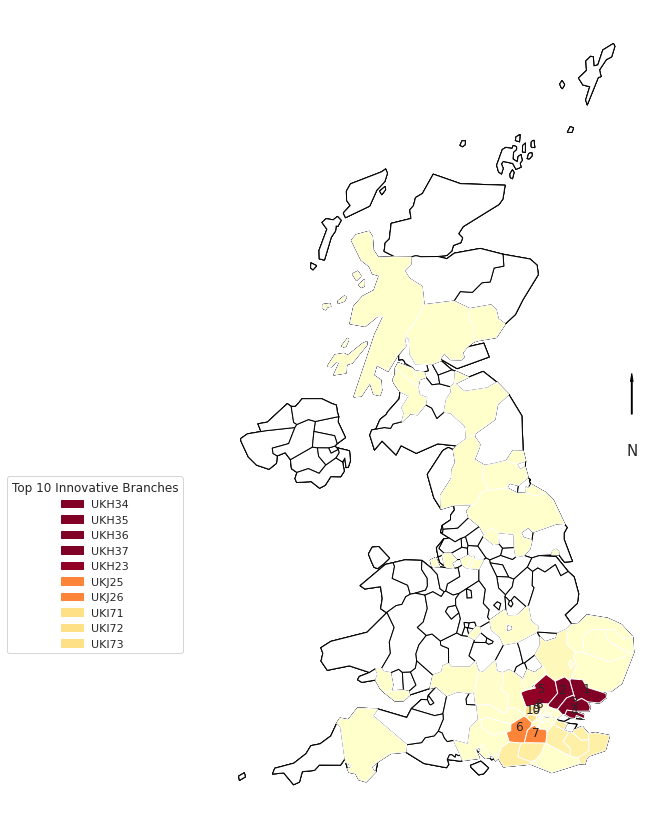

In [63]:
combined_gl_reg_gdf['count'] = pd.to_numeric(combined_gl_reg_gdf['count'])
combined_gl_reg_gdf = gpd.GeoDataFrame(combined_gl_reg_gdf, geometry='geometry')
combined_gl_reg_gdf = combined_gl_reg_gdf.to_crs(uk_gdf.crs)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

base = uk_gdf.plot(ax=ax, color='white', edgecolor = "black")
combined_gl_reg_gdf.plot(ax=base, column='count', cmap='YlOrRd')
# incubator_gdf.plot(ax=ax, color='blue', markersize=20)

# cmap = plt.get_cmap('YlOrRd')
# norm = mcolors.Normalize(vmin=combined_gl_reg_gdf['count'].min(), vmax=combined_gl_reg_gdf['count'].max())
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# fig.colorbar(sm, ax=ax, orientation='vertical', label='Number of Patents')

# arrow = mpatches.Arrow(0.95, 0.5, 0, 0.05, width=0.01, transform=ax.transAxes, color='black')
# ax.add_patch(arrow)
# ax.text(0.95, 0.45, 'N', transform=ax.transAxes, ha='center', fontsize=15)
leg = ax.get_legend()
# # Rank the regions based on 'LQ' and keep only the top 10
# LQ_gdf['rank'] = LQ_gdf['LQ'].rank(method='dense', ascending=False)
# top10 = LQ_gdf[LQ_gdf['rank'] <= 10]

top10 = combined_gl_reg_gdf.nlargest(10, 'count')
top10_colors = top10['count']
cmap = plt.get_cmap('YlOrRd')
vmin = combined_gl_reg_gdf['count'].min()
vmax = combined_gl_reg_gdf['count'].max()
legend_elements = []

# Add top 10 regions to the legend and add labels to the map
for i, (idx, row) in enumerate(top10.iterrows()):
    color = cmap((row['count'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_ID'])
    legend_elements.append(patch)
    
    # Add labels to the map
    ax.annotate(text=str(i+1), xy=row['geometry'].centroid.coords[0], ha='center')

ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Top 10 Innovative Branches')




arrow = mpatches.Arrow(0.95, 0.5, 0, 0.05, width=0.01, transform=ax.transAxes, color='black')
ax.add_patch(arrow)
ax.text(0.95, 0.45, 'N', transform=ax.transAxes, ha='center', fontsize=15)

ax.grid(False)
ax.axis('off')

plt.savefig('glaxo_map_new.png', dpi=300, bbox_inches='tight')
plt.show()

### Zeneca

In [128]:
ast = app[app['app_name'].str.contains('astra', case=False, na=False)]
# ast

In [129]:
ast['app_name'].unique()

array(['astrazeneca uk limited', 'astra pharmaceuticals limited',
       'astrazeneca limited'], dtype=object)

In [130]:
ast = ast[ast['app_name'] == 'astra pharmaceuticals limited'
         ]
len(ast)

14

In [131]:
zn = app[app['app_name'].str.contains('zeneca', case=False, na=False)]
len(zn)

433

In [132]:
zn['app_name'].unique()

array(['zeneca limited', 'astrazeneca uk limited', 'astrazeneca limited'],
      dtype=object)

In [133]:
aszn = app[app['app_name'].str.contains('astrazeneca', case=False, na=False)]
# aszn

### Postcodes

In [114]:
postcode_regex = r"[A-Z]{1,2}[0-9R][0-9A-Z]? [0-9][A-Z]{2}"

# keep only rows where 'address' matches the postcode pattern
glaxo_branches_no = glaxo_branches[~glaxo_branches['address'].str.contains(postcode_regex, na=False)]
len(glaxo_branches_no['address'].unique())

113

In [116]:
postcode_regex = r"[A-Z]{1,2}[0-9R][0-9A-Z]? [0-9][A-Z]{2}"

# keep only rows where 'address' matches the postcode pattern
glaxo_branches = glaxo_branches[glaxo_branches['address'].str.contains(postcode_regex, na=False)]
len(glaxo_branches['address'].unique())

278

In [59]:
import re

In [138]:
pattern = r'[A-Z]{1,2}[0-9R][0-9A-Z]? [0-9][A-Z]{2}' # regex pattern for UK postcodes
glaxo_branches['postcode'] = glaxo_branches['address'].apply(lambda x: re.findall(pattern, x.upper()))


glaxo_branches['postcode'] = glaxo_branches['postcode'].apply(lambda x: x[0] if x else None)

glaxo_branches.head()

Unnamed: 0        app_nbr    appln_id  person_id            inv_name  \
282         282  EP19780300488  16429689.0  2219170.0  Judd, Duncan Bruce   
283         283  EP19780300488  16429689.0  2219170.0  Judd, Duncan Bruce   
284         284  EP19780300488  16429689.0  2219170.0  Judd, Duncan Bruce   
285         285  EP19780300488  16429689.0  2219170.0  Judd, Duncan Bruce   
286         286  EP19780300488  16429689.0  2219170.0  Judd, Duncan Bruce   

                                        address reg_code ctry_code  prio_year  \
282  61 Musley Lane,Ware Hertfordshire SG12 7EP    UKH23        GB     1977.0   
283  61 Musley Lane,Ware Hertfordshire SG12 7EP    UKH23        GB     1977.0   
284  61 Musley Lane,Ware Hertfordshire SG12 7EP    UKH23        GB     1977.0   
285  61 Musley Lane,Ware Hertfordshire SG12 7EP    UKH23        GB     1977.0   
286  61 Musley Lane,Ware Hertfordshire SG12 7EP    UKH23        GB     1977.0   

     app_year          IPC  postcode  
282    1978.0   A61K031/34  SG12 7EP  
283    1978.0  A61K031/341  SG12 7EP  
284    1978.0   A61P001/04  SG12 7EP  
285    1978.0  C07D 307/52  SG12 7EP  
286    1978.0  C07D 307/56  SG12 7EP

In [139]:
glaxo_branches=glaxo_branches.drop_duplicates(subset = ['app_nbr', 'postcode'])

In [140]:
len(glaxo_branches['postcode'].unique())

71

In [142]:
# Count the number of patents for each postcode
patent_branches = glaxo_branches.groupby('postcode')['app_nbr'].count()
patent_branches.sort_values( ascending = False)

postcode
SG1 2NY     348
CM19 5AW    164
SG12 0DP     68
SG12 0DG     40
UB6 0HE      33
           ... 
IP11 7QN      1
AL7 2HL       1
MK45 2BP      1
NW11 7UA      1
WC1E 1HT      1
Name: app_nbr, Length: 71, dtype: int64

In [143]:
patent_branches = patent_branches.reset_index()
patent_branches.columns=['postcode','count']
patent_branches.head()

postcode  count
0   AL6 9AR      6
1   AL7 2HL      1
2   B15 2TT      2
3    B7 4EJ      1
4  BN14 8QH      1

In [90]:
# %time patent_branches[['latitude', 'longitude']] = patent_branches['postcode'].apply(get_coordinates)

In [83]:
# ! pip install opencage

In [144]:
patent_branches[['latitude', 'longitude']] = patent_branches['postcode'].apply(get_coordinates_none)
patent_branches

postcode  count   latitude  longitude
0    AL6 9AR      6  51.820017  -0.224631
1    AL7 2HL      1  51.794134  -0.171677
2    B15 2TT      2  52.453282  -1.927890
3     B7 4EJ      1  52.486519  -1.884704
4   BN14 8QH      1  50.830422  -0.361387
..       ...    ...        ...        ...
66   UB6 0HE     33  51.549667  -0.341236
67   UB6 0NN      3  51.549050  -0.340249
68   UB6 8RF      1  51.533183  -0.348908
69   W1P 6DP      1        NaN        NaN
70  WC1E 1HT      1  51.508500  -0.125700

[71 rows x 4 columns]

In [145]:
patent_branches[patent_branches['latitude'].isna()]

postcode  count  latitude  longitude
55  SG21 2NY      1       NaN        NaN
69   W1P 6DP      1       NaN        NaN

In [133]:
# patent_branches = patent_branches.merge(glaxo_branches[['postcode', 'inv_name']], on='postcode', how='left')
# patent_branches

In [146]:
patent_branches = patent_branches.dropna()

In [147]:
patent_branches.to_csv('glaxo_branches.csv', index = False)

In [126]:
glaxo_branches_no = glaxo_branches_no.drop_duplicates(subset=['app_nbr','address'])

In [127]:
glaxo_branches_no.groupby('address')['app_nbr'].count().sort_values(ascending = False)

address
28 Middleton Avenue,Greenford Middlesex                                               9
2 Wendover Drive,Welwyn Hertfordshire                                                 9
60 Green Drift,Royston Hertfordshire                                                  7
60, Downlands,Royston Hertfordshire                                                   6
54 Gilders,Sawbridgeworth Hertfordshire                                               6
                                                                                     ..
40 Woodlands Road,Ulverston Cumbria                                                   1
35, Woodlands Road Hertford,Hertfordshire                                             1
35 Layston Park,Royston, Hertfordshire                                                1
35 Layston Park,Royston Hertfordshire                                                 1
c/o GlaxoSmithKline New frontiers Science Park Third Avenue,Harlow Essex CM 19 5AW    1
Name: app_nbr, Length: 1

In [157]:
patent_branches['count'] = pd.to_numeric(patent_branches['count'], errors='coerce')

AttributeError: 'tuple' object has no attribute 'plot'

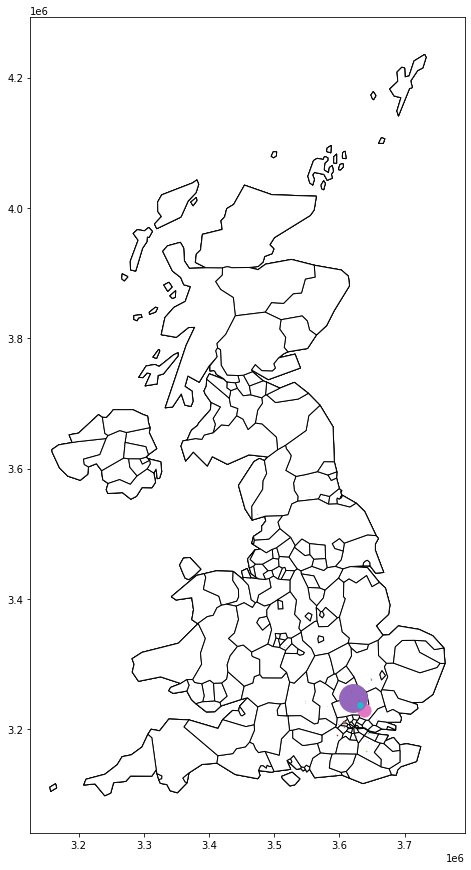

In [169]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

patent_branches['geometry'] = patent_branches.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
patent_branches_gdf = gpd.GeoDataFrame(patent_branches, geometry='geometry', crs="EPSG:4326")

patent_branches_gdf = patent_branches_gdf.to_crs(uk_gdf.crs)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

scale = 0.08
# Plot the base map
uk_gdf.plot(ax=ax, color='white', edgecolor='black')

# Plot the branches
for x, y, size in zip(patent_branches_gdf.geometry.x, patent_branches_gdf.geometry.y, patent_branches_gdf['count']):
    ax.plot(x, y, 'o', markersize=size*scale)
post_glaxo1.plot(ax=ax, color='red', markersize=100)
post_glaxo2.plot(ax=ax, color='red', markersize=100)
ax.set_aspect('equal')
# Remove the axis
ax.axis('off')

plt.show()


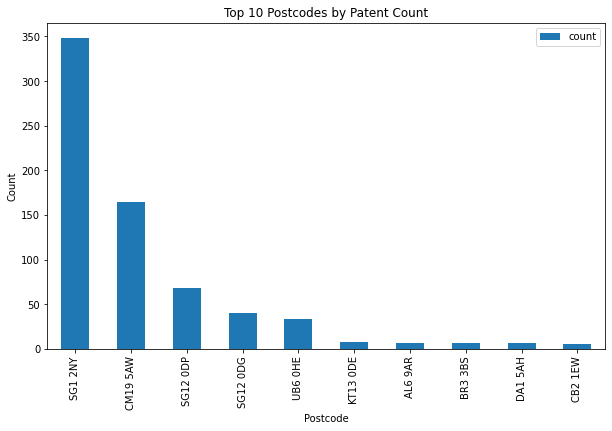

In [171]:
top_10_postcodes = patent_branches.sort_values('count', ascending=False).head(10)
top_10_postcodes.plot(kind='bar', x='postcode', y='count', figsize=(10, 6))

plt.title('Top 10 Postcodes by Patent Count')
plt.xlabel('Postcode')
plt.ylabel('Count')

plt.show()


### Network

In [71]:
G = pd.read_csv('data/Citation_Network.csv')
G.head()

Citing_app_nbr  Cited_App_nbr
0  EP19790300237  EP19780300148
1  EP19790301143  EP19780100823
2  EP19790301145  EP19780100823
3  EP19790301144  EP19780100823
4  EP19790301142  EP19780100823

In [72]:
citation = pd.read_csv('data/Merged_UK.csv')
citation.head()

Citing_app_nbr  Cited_App_nbr   IPC_Citing reg_code_citing  \
0  EP19790300237  EP19780300148   A61K031/43           UKI23   
1  EP19790300237  EP19780300148   A61K031/43           UKI23   
2  EP19790301143  EP19780100823  A61K031/415           UKH23   
3  EP19790301145  EP19780100823  A61K031/415           UKH33   
4  EP19790301144  EP19780100823  A61K031/415           UKH23   

   prio_year_citing   IPC_Cited reg_code_Cited  prio_year_cited  
0            1978.0  A61K031/41          UKI23             1977  
1            1978.0  A61K031/41          UKJ13             1977  
2            1978.0        A61K          UKJ42             1977  
3            1978.0        A61K          UKJ42             1977  
4            1978.0        A61K          UKJ42             1977

In [240]:
# citation = citation.drop(['IPC_Citing', 'IPC_Cited'], axis=1)

### Citing Patents Map

In [290]:
citing = citation[['Citing_app_nbr','reg_code_citing','prio_year_citing']]
citing = citing.drop_duplicates()
citing.head()

Citing_app_nbr reg_code_citing  prio_year_citing
0  EP19790300237           UKI23            1978.0
2  EP19790301143           UKH23            1978.0
3  EP19790301145           UKH33            1978.0
4  EP19790301144           UKH23            1978.0
5  EP19790301142           UKH33            1978.0

In [291]:
new_citing = pd.DataFrame(columns=citing.columns)

for idx, row in citing.iterrows():
    if row['reg_code_citing'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code_citing']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code_citing'] = new_code
            new_citing = new_citing.append(new_row)
    else:
        new_citing = new_citing.append(row)
new_citing = new_citing.reset_index(drop=True)
new_citing.head()

Citing_app_nbr reg_code_citing  prio_year_citing
0  EP19790300237           UKI71            1978.0
1  EP19790300237           UKI72            1978.0
2  EP19790300237           UKI73            1978.0
3  EP19790300237           UKI74            1978.0
4  EP19790300237           UKI75            1978.0

In [292]:
new_citing.to_csv('data/Citing_New.csv', index= False)

In [293]:
# Count the number of patents for each region
patent_counts = new_citing.groupby('reg_code_citing')['Citing_app_nbr'].count()
patent_counts

reg_code_citing
GBZZZ    118
UKC11      9
UKC12      2
UKC13      2
UKC14     13
        ... 
UKN02      1
UKN03     17
UKN04      1
UKN05      2
UKN06      1
Name: Citing_app_nbr, Length: 149, dtype: int64

In [294]:
# Count the number of unique years for each region
year_counts_citing = new_citing.groupby('reg_code_citing')['prio_year_citing'].nunique().reset_index()

# Rename the columns
year_counts_citing.columns = ['reg_code_citing', 'year_count']

year_counts_citing


reg_code_citing  year_count
0             GBZZZ          27
1             UKC11           5
2             UKC12           2
3             UKC13           1
4             UKC14           9
..              ...         ...
144           UKN02           1
145           UKN03           8
146           UKN04           1
147           UKN05           2
148           UKN06           1

[149 rows x 2 columns]

In [295]:
# Convert the series to a DataFrame
patent_counts_df = patent_counts.reset_index()

# Rename the columns
patent_counts_df.columns = ['reg_code_citing', 'Total_Patent_Count']

patent_counts_df = patent_counts_df.merge(year_counts_citing, on = 'reg_code_citing', how = 'left')
print(patent_counts_df['year_count'].isna().sum())

0


In [296]:
patent_counts_df['normalized_patent_counts'] = patent_counts_df['Total_Patent_Count'] / patent_counts_df['year_count']

citing_counts_gdf = patent_counts_df.merge(gdf, left_on='reg_code_citing', right_on='NUTS_ID', how='left')

citing_counts_gdf.head()

reg_code_citing  Total_Patent_Count  year_count  normalized_patent_counts  \
0           GBZZZ                 118          27                  4.370370   
1           UKC11                   9           5                  1.800000   
2           UKC12                   2           2                  1.000000   
3           UKC13                   2           1                  2.000000   
4           UKC14                  13           9                  1.444444   

  NUTS_ID  LEVL_CODE CNTR_CODE                        NAME_LATN  \
0     NaN        NaN       NaN                              NaN   
1   UKC11        3.0        UK  Hartlepool and Stockton-on-Tees   
2   UKC12        3.0        UK                   South Teesside   
3   UKC13        3.0        UK                       Darlington   
4   UKC14        3.0        UK                        Durham CC   

                         NUTS_NAME  MOUNT_TYPE  URBN_TYPE  COAST_TYPE    FID  \
0                              NaN         NaN        NaN         NaN    NaN   
1  Hartlepool and Stockton-on-Tees         4.0        1.0         1.0  UKC11   
2                   South Teesside         4.0        1.0         1.0  UKC12   
3                       Darlington         4.0        1.0         2.0  UKC13   
4                        Durham CC         4.0        1.0         1.0  UKC14   

                                            geometry  
0                                               None  
1  POLYGON ((3598172.586 3553993.879, 3597951.864...  
2  POLYGON ((3625708.122 3546887.147, 3616038.678...  
3  POLYGON ((3585028.631 3557236.128, 3583327.063...  
4  POLYGON ((3582515.806 3590052.703, 3587447.069...

In [297]:
print(citing_counts_gdf['NUTS_ID'].isna().sum())

5


In [298]:
len(citing_counts_gdf)

149

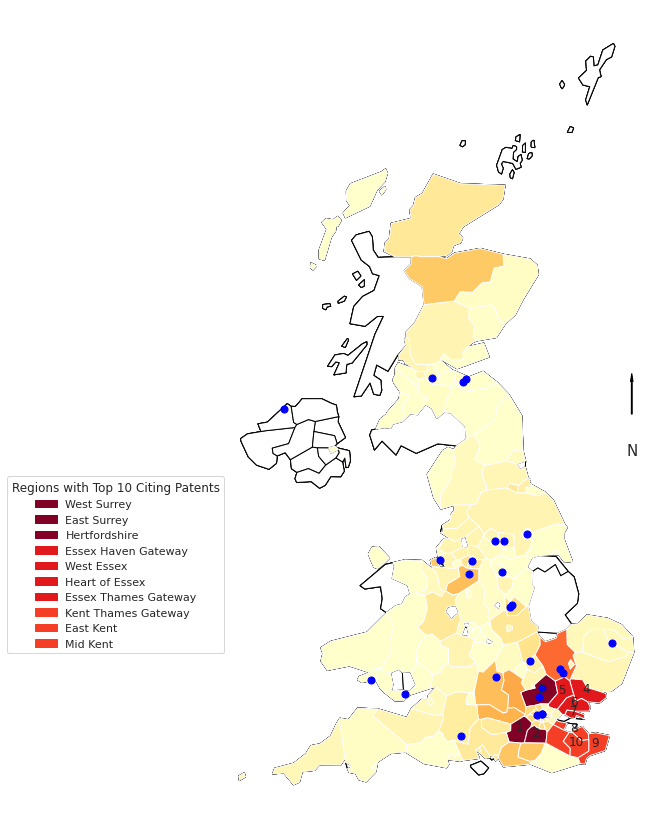

In [363]:
# Set the CRS of LQ_gdf to match the CRS of uk_gdf
citing_counts_gdf = gpd.GeoDataFrame(citing_counts_gdf, geometry='geometry')
citing_counts_gdf = citing_counts_gdf.to_crs(uk_gdf.crs)

# citing_counts_gdf['contains_incubator'] = citing_counts_gdf['NUTS_ID'].isin(incubator_gdf_new['NUTS_ID'])
# edgecolor = citing_counts_gdf['contains_incubator'].map({True: 'blue', False: 'white'})
# Now you can plot your data
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
base = uk_gdf.plot(ax=ax, color='white', edgecolor='black')
citing_counts_gdf.plot(ax=base, column='Total_Patent_Count', cmap='YlOrRd')
incubator_gdf.plot(ax=ax, color='blue', markersize=50)
leg = ax.get_legend()
top10 = citing_counts_gdf.nlargest(10, 'Total_Patent_Count')
top10_colors = top10['Total_Patent_Count']
cmap = plt.get_cmap('YlOrRd')
vmin = citing_counts_gdf['normalized_patent_counts'].min()
vmax = citing_counts_gdf['normalized_patent_counts'].max()
legend_elements = []

# Add top 10 regions to the legend and add labels to the map
for i, (idx, row) in enumerate(top10.iterrows()):
    color = cmap((row['normalized_patent_counts'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
    legend_elements.append(patch)
    
    # Add labels to the map
    ax.annotate(text=str(i+1), xy=row['geometry'].centroid.coords[0], ha='center')

ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 Citing Patents')

# Add a north arrow
arrow = mpatches.Arrow(0.95, 0.5, 0, 0.05, width=0.01, transform=ax.transAxes, color='black')
ax.add_patch(arrow)
ax.text(0.95, 0.45, 'N', transform=ax.transAxes, ha='center', fontsize=15)

# Remove grid and axes
ax.grid(False)
ax.axis('off')

plt.savefig('Citing_map.png', dpi=300, bbox_inches='tight')
plt.show()

### Network Plot

In [73]:
import networkx as nx
graph = nx.from_pandas_edgelist(G, source='Citing_app_nbr', target='Cited_App_nbr', create_using=nx.DiGraph())

in_degrees = graph.in_degree()

# Find the node with the highest in-degree
most_cited_node = max(in_degrees, key=lambda x: x[1])

print(f"The most cited patent is {most_cited_node[0]} with {most_cited_node[1]} citations.")


The most cited patent is EP19870302620 with 55 citations.


In [76]:
# Number of nodes
num_nodes = len(graph.nodes())

# Number of links (edges)
num_links = len(graph.edges())

# Number of weakly connected components (for directed graph)
num_weak_components = nx.number_weakly_connected_components(graph)

# Number of strongly connected components (for directed graph)
num_strong_components = nx.number_strongly_connected_components(graph)

print(f"Number of nodes: {num_nodes}")
print(f"Number of links: {num_links}")
print(f"Number of weakly connected components: {num_weak_components}")
print(f"Number of strongly connected components: {num_strong_components}")

Number of nodes: 3501
Number of links: 3036
Number of weakly connected components: 999
Number of strongly connected components: 3493


In [74]:
in_degrees_dict = dict(graph.in_degree())

sorted_nodes = sorted(in_degrees_dict, key=in_degrees_dict.get, reverse=True)

N = 50 
top_nodes = sorted_nodes[:N]

# Get all nodes that are directly connected to the top nodes
connected_nodes = set()
for node in top_nodes:
    connected_nodes.update(graph.predecessors(node))

# Create a subgraph with the top nodes and their connected nodes
G_sub = graph.subgraph(list(connected_nodes))

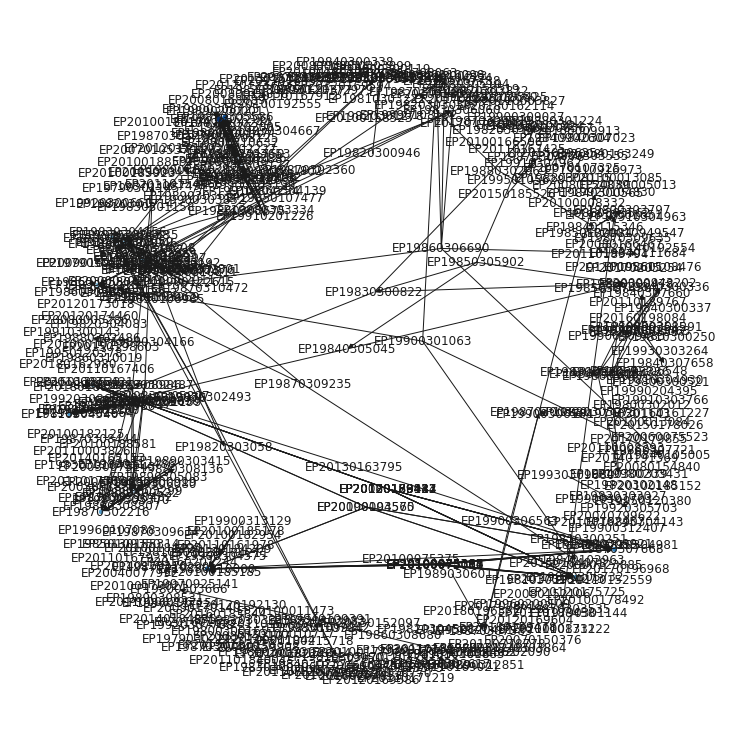

In [317]:
# # Create a color map that is proportional to the in-degrees
# colors = [in_degrees_dict.get(n, 0) for n in G_sub.nodes()]

# Calculate the in-degrees of the nodes in the subgraph
in_degrees_sub = [in_degrees_dict.get(n, 0) for n in G_sub.nodes()]

# Create a spring layout
pos = nx.spring_layout(G_sub)

plt.figure(figsize=(10, 10))
nx.draw(G_sub, node_size=in_degrees_sub, node_color=in_degrees_sub, with_labels=True, cmap=plt.cm.Blues)
plt.show()

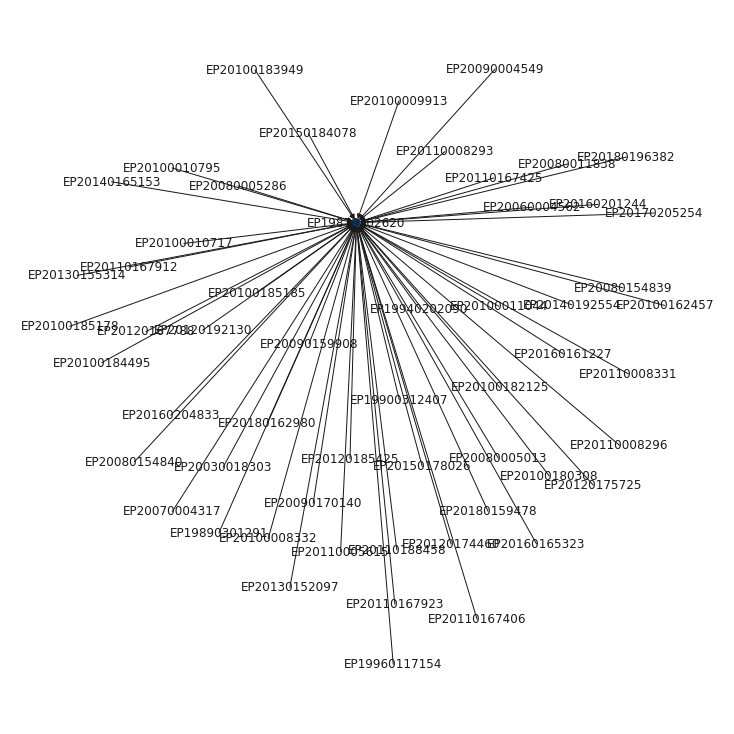

In [318]:
# Identify the node with the highest in-degree
top_node = max(in_degrees_dict, key=in_degrees_dict.get)

# Get all nodes that are directly connected to the top node
connected_nodes = list(graph.predecessors(top_node))

# Add the top node to the list of connected nodes
connected_nodes.append(top_node)

# Create a subgraph with the top node and its connected nodes
G_sub = graph.subgraph(connected_nodes)

# Calculate the in-degrees of the nodes in the subgraph
in_degrees_sub = [in_degrees_dict.get(n, 0) for n in G_sub.nodes()]

# Create the plot
plt.figure(figsize=(10, 10))
nx.draw(G_sub, node_size=in_degrees_sub, node_color=in_degrees_sub, with_labels=True, cmap=plt.cm.Blues)
plt.show()


In [319]:
# Convert the directed graph to an undirected graph
G_undirected = graph.to_undirected()
connected_components = nx.connected_components(G_undirected)

# Get the largest connected component (GCC)
GCC = max(connected_components, key=len)

# Create a subgraph with the nodes in the GCC
G_GCC = graph.subgraph(GCC)

# Calculate the in-degrees of the nodes in the subgraph
in_degrees_GCC = [in_degrees_dict.get(n, 0) for n in G_GCC.nodes()]

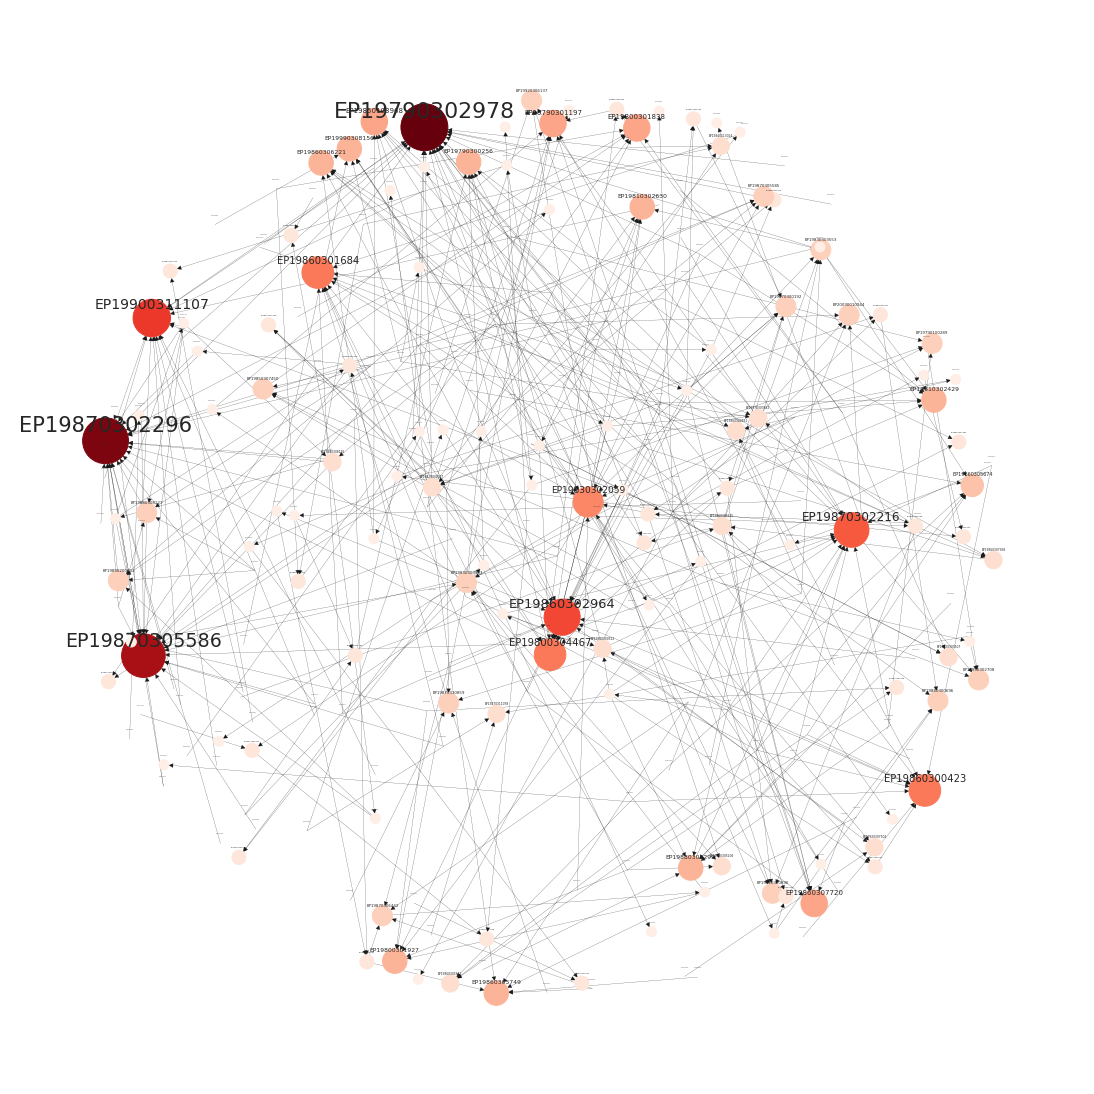

In [320]:
# Normalize the in-degrees for the color map
colors = [(in_degrees_dict.get(n, 0) - min(in_degrees_GCC)) / (max(in_degrees_GCC) - min(in_degrees_GCC)) for n in G_GCC.nodes()]

# Create a spring layout with a larger optimal distance between nodes
pos = nx.spring_layout(G_GCC, k=0.5)

# Create the plot
plt.figure(figsize=(15, 15))
nx.draw(G_GCC, pos, node_size=[i * 100 for i in in_degrees_GCC], node_color=colors, with_labels=False, cmap=plt.cm.Reds, width=0.2)

# Add labels with font size proportional to in-degree
for node, (x, y) in pos.items():
    plt.text(x, y+0.02, s=node, fontsize=in_degrees_dict.get(node, 0), horizontalalignment='center')
plt.savefig('network.png', dpi=300, bbox_inches='tight')
plt.show()

### Normalizse Citation Count

In [293]:
# Convert the in-degrees to a DataFrame
in_degrees_df = pd.DataFrame(in_degrees, columns=['Cited_App_nbr', 'in_degree'])

# Merge the in-degrees DataFrame with location
merged_df = pd.merge(in_degrees_df, citation[['Cited_App_nbr', 'reg_code_Cited']].drop_duplicates(), on='Cited_App_nbr', how='left')
# Select rows where 'in_degree' is not 0
merged_df = merged_df[merged_df['in_degree'] != 0]
merged_df = pd.merge(merged_df, citation[['Cited_App_nbr', 'prio_year_cited']].drop_duplicates(), on='Cited_App_nbr', how='left')
print(merged_df)

      Cited_App_nbr  in_degree reg_code_Cited  prio_year_cited
0     EP19780300148          3          UKI23             1977
1     EP19780300148          3          UKJ13             1977
2     EP19780100823          6          UKJ42             1977
3     EP19790301145          1          UKH33             1978
4     EP19790301142          1          UKH33             1978
...             ...        ...            ...              ...
2336  EP20130789610          1          UKD31             2012
2337  EP20150734640          1          UKG32             2014
2338  EP20150734640          1          UKJ13             2014
2339  EP20150734640          1          UKG13             2014
2340  EP20170717172          1          UKD71             2016

[2341 rows x 4 columns]


In [266]:
# Create a new column for the end of the 5-year period after the priority year
citation['end_of_5_years'] = citation['prio_year_cited'] + 5

# Filter the dataset to only include citations that occurred within five years after the priority year
citations_within_5_years = citation[citation['prio_year_citing'] <= citation['end_of_5_years']]

In [267]:
citations_within_5_years = citations_within_5_years.drop_duplicates(subset=['Cited_App_nbr','Citing_app_nbr'])

In [268]:
# Group by the cited patent number and region code, then count the number of citations
citations_count = citations_within_5_years.groupby(['Cited_App_nbr', 'reg_code_Cited']).size()

# Reset the index so that the patent number and region code are columns instead of the index
citations_count = citations_count.reset_index()

# Rename the 0 column to 'citation_count'
citations_count = citations_count.rename(columns={0: 'citation_count'})

In [269]:
citations_count.sort_values(by='citation_count', ascending=False)

Cited_App_nbr reg_code_Cited  citation_count
498   EP19870302296          UKH23              21
61    EP19790302978          UKH23              19
516   EP19870305586          UKH23              19
227   EP19830302613          UKD62              15
145   EP19810304540          UKH23              13
...             ...            ...             ...
554   EP19880202880          UKJ23               1
555   EP19880300279          UKI23               1
558   EP19880301306          UKJ13               1
559   EP19880301348          UKJ14               1
1237  EP20170717172          UKD71               1

[1238 rows x 3 columns]

In [ ]:
# new_cited.to_csv('data/Cited_New.csv', index= False)

The most cited patent does not have a valid region code. So use the detailed address:

In [336]:
# merged_df.to_csv('data/In_dgree.csv', index=False)

### Most Influential Regions

In [207]:
# Group by 'reg_code_cited' and sum the in_dgree
region_citation_counts = citations_count.groupby('reg_code_Cited')['citation_count'].sum()

# Print the result
print(region_citation_counts)

reg_code_Cited
GBZZZ    227
GY000      1
IM000      3
UKC11      9
UKC12      1
        ... 
UKM38     10
UKM50      9
UKM63      3
UKN03     19
UKN04      1
Name: citation_count, Length: 120, dtype: int64


In [208]:
# Convert the series to a DataFrame
region_citation_counts_df = region_citation_counts.reset_index()

# Rename the columns
# region_citation_counts_df.columns = ['reg_code_cited', 'normalized_citation_counts']
region_citation_counts_df

reg_code_Cited  citation_count
0            GBZZZ             227
1            GY000               1
2            IM000               3
3            UKC11               9
4            UKC12               1
..             ...             ...
115          UKM38              10
116          UKM50               9
117          UKM63               3
118          UKN03              19
119          UKN04               1

[120 rows x 2 columns]

In [209]:
new_cited = pd.DataFrame(columns=region_citation_counts_df.columns)

for idx, row in region_citation_counts_df.iterrows():
    if row['reg_code_Cited'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code_Cited']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code_Cited'] = new_code
            new_cited = new_cited.append(new_row)
    else:
        new_cited = new_cited.append(row)
new_cited = new_cited.reset_index(drop=True)
new_cited.head()

reg_code_Cited citation_count
0          GBZZZ            227
1          GY000              1
2          IM000              3
3          UKC11              9
4          UKC12              1

In [210]:
# region_citation_counts_df['normalized_citation_counts'] = region_citation_counts_df['Total_Citation_Count'] / region_citation_counts_df['year_count']

cited_counts_gdf = new_cited.merge(gdf, left_on='reg_code_Cited', right_on='NUTS_ID', how='left')

cited_counts_gdf.head()

reg_code_Cited citation_count NUTS_ID  LEVL_CODE CNTR_CODE  \
0          GBZZZ            227     NaN        NaN       NaN   
1          GY000              1     NaN        NaN       NaN   
2          IM000              3     NaN        NaN       NaN   
3          UKC11              9   UKC11        3.0        UK   
4          UKC12              1   UKC12        3.0        UK   

                         NAME_LATN                        NUTS_NAME  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3  Hartlepool and Stockton-on-Tees  Hartlepool and Stockton-on-Tees   
4                   South Teesside                   South Teesside   

   MOUNT_TYPE  URBN_TYPE  COAST_TYPE    FID  \
0         NaN        NaN         NaN    NaN   
1         NaN        NaN         NaN    NaN   
2         NaN        NaN         NaN    NaN   
3         4.0        1.0         1.0  UKC11   
4         4.0        1.0         1.0  UKC12   

                                            geometry  
0                                               None  
1                                               None  
2                                               None  
3  POLYGON ((3598172.586 3553993.879, 3597951.864...  
4  POLYGON ((3625708.122 3546887.147, 3616038.678...

In [211]:
print(cited_counts_gdf['NUTS_ID'].isna().sum())

5


In [212]:
cited_counts_gdf = cited_counts_gdf.dropna(subset = ['NUTS_ID'])

In [213]:
cited_counts_gdf['citation_count'] = pd.to_numeric(cited_counts_gdf['citation_count'])

In [214]:
top10_cited = cited_counts_gdf.nlargest(10, 'citation_count')
print(top10_cited)


    reg_code_Cited  citation_count NUTS_ID  LEVL_CODE CNTR_CODE  \
67           UKH23             520   UKH23        3.0        UK   
101          UKJ25             449   UKJ25        3.0        UK   
102          UKJ26             449   UKJ26        3.0        UK   
70           UKH34             326   UKH34        3.0        UK   
71           UKH35             326   UKH35        3.0        UK   
72           UKH36             326   UKH36        3.0        UK   
73           UKH37             326   UKH37        3.0        UK   
97           UKJ13             246   UKJ13        3.0        UK   
112          UKJ43             204   UKJ43        3.0        UK   
113          UKJ44             204   UKJ44        3.0        UK   

                NAME_LATN             NUTS_NAME  MOUNT_TYPE  URBN_TYPE  \
67          Hertfordshire         Hertfordshire         4.0        1.0   
101           West Surrey           West Surrey         4.0        1.0   
102           East Surrey           East

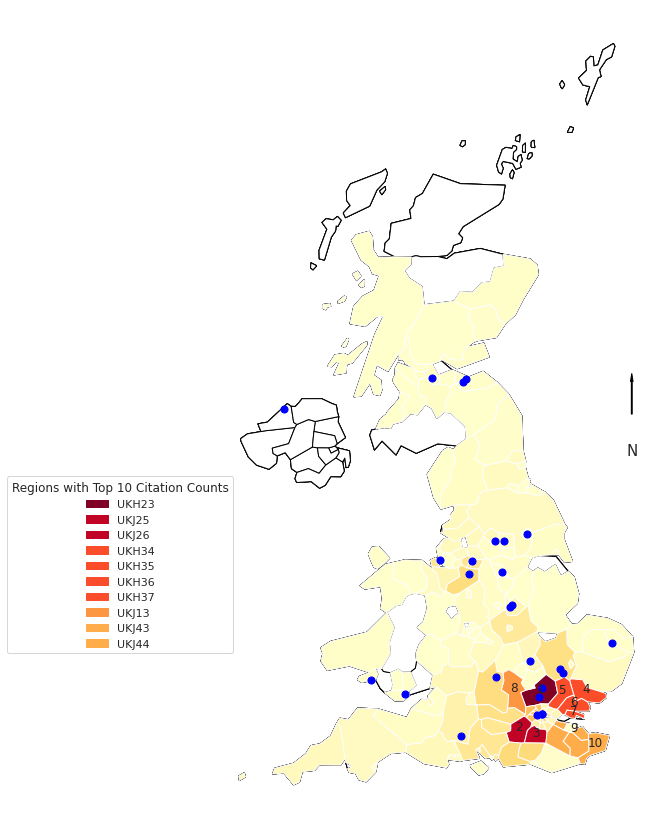

In [215]:
# Set the CRS of CITED_gdf to match the CRS of uk_gdf
cited_counts_gdf = gpd.GeoDataFrame(cited_counts_gdf, geometry='geometry')
cited_counts_gdf = cited_counts_gdf.to_crs(uk_gdf.crs)

# Now you can plot your data
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Create the base map
base = uk_gdf.plot(ax=ax, color='white', edgecolor='black')
# cited_counts_gdf['contains_incubator'] = cited_counts_gdf['NUTS_ID'].isin(incubator_gdf_new['NUTS_ID'])
# edgecolor = cited_counts_gdf['contains_incubator'].map({True: 'blue', False: 'white'})
# Add regions to the base map
cited_counts_gdf.plot(ax=base, column='citation_count', cmap='YlOrRd')
incubator_gdf.plot(ax=ax, color='blue', markersize=50)

# Move the legend to the right
leg = ax.get_legend()

# Label regions
# Find the top 10 regions
top10 = cited_counts_gdf.nlargest(10, 'citation_count')
top10_colors = top10['citation_count']

cmap = plt.get_cmap('YlOrRd')

# Get min and max citation counts for normalization
vmin = cited_counts_gdf['citation_count'].min()
vmax = cited_counts_gdf['citation_count'].max()

# Generate legend elements
legend_elements = []

# Add top 10 regions to the legend and add labels to the map
for i, (idx, row) in enumerate(top10.iterrows()):
    color = cmap((row['citation_count'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_ID'])
    legend_elements.append(patch)
    
    # Add labels to the map
    ax.annotate(text=str(i+1), xy=row['geometry'].centroid.coords[0], ha='center')

ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 Citation Counts')

# Add a north arrow
arrow = mpatches.Arrow(0.95, 0.5, 0, 0.05, width=0.01, transform=ax.transAxes, color='black')
ax.add_patch(arrow)
ax.text(0.95, 0.45, 'N', transform=ax.transAxes, ha='center', fontsize=15)

# Remove grid and axes
ax.grid(False)
ax.axis('off')
plt.savefig('Cited_map_new.png', dpi=300, bbox_inches='tight')

plt.show()

### Self-citation Analysis: a patent cites another patent from the same region -- to understand the extent of local knowledge spillovers.

In [370]:
citation['is_self_citation'] = citation['reg_code_citing'] == citation['reg_code_Cited']

In [371]:
# Calculate the total number of self-citations
total_self_citations = citation['is_self_citation'].sum()

# Calculate the total number of citations
total_citations = len(citation['Cited_App_nbr'])

# Calculate the proportion of self-citations
proportion_self_citations = total_self_citations / total_citations

print(f"The total number of self-citations is {total_self_citations}.")
print(f"The total number of citations is {total_citations}.")
print(f"The proportion of self-citations is {proportion_self_citations}.")

The total number of self-citations is 1613.
The total number of citations is 6206.
The proportion of self-citations is 0.25990976474379635.


In [326]:
citation.head()

Citing_app_nbr  Cited_App_nbr   IPC_Citing reg_code_citing  \
0  EP19790300237  EP19780300148   A61K031/43           UKI23   
1  EP19790300237  EP19780300148   A61K031/43           UKI23   
2  EP19790301143  EP19780100823  A61K031/415           UKH23   
3  EP19790301145  EP19780100823  A61K031/415           UKH33   
4  EP19790301144  EP19780100823  A61K031/415           UKH23   

   prio_year_citing   IPC_Cited reg_code_Cited  prio_year_cited  \
0            1978.0  A61K031/41          UKI23             1977   
1            1978.0  A61K031/41          UKJ13             1977   
2            1978.0        A61K          UKJ42             1977   
3            1978.0        A61K          UKJ42             1977   
4            1978.0        A61K          UKJ42             1977   

   is_self_citation  
0              True  
1             False  
2             False  
3             False  
4             False

In [372]:
# Group by 'reg_code_citing' and sum the 'is_self_citation' column
self_citations_by_region = citation.groupby('reg_code_citing')['is_self_citation'].sum()
# Convert the Series to a DataFrame
# self_citations_by_region_df = self_citations_by_region.reset_index()
# Sort the results in descending order and take the top 5
top5_regions_self_citations = self_citations_by_region.sort_values(ascending=False).head(5)

print(top5_regions_self_citations)


reg_code_citing
UKJ23    259
UKH23    257
UKH33    179
UKJ42    127
UKD74     72
Name: is_self_citation, dtype: int64


In [373]:
len(self_citations_by_region)

115

In [374]:
# Calculate the total number of patents in each region
total_patents = citation.groupby('reg_code_citing')['Citing_app_nbr'].count()

# Normalize the self citation counts by the total number of patents in each region
normalized_self_citation_counts = self_citations_by_region / total_patents
normalized_self_citation_counts

reg_code_citing
GBZZZ    0.236000
UKC11    0.157895
UKC12    0.000000
UKC13    0.000000
UKC14    0.116279
           ...   
UKN01    0.000000
UKN02    0.000000
UKN03    0.933333
UKN04    0.000000
UKN05    0.000000
Length: 115, dtype: float64

In [375]:
norm_self_df = normalized_self_citation_counts.reset_index()
norm_self_df.columns = ['reg_code_citing','percentage of self citation']
norm_self_df.head()

reg_code_citing  percentage of self citation
0           GBZZZ                     0.236000
1           UKC11                     0.157895
2           UKC12                     0.000000
3           UKC13                     0.000000
4           UKC14                     0.116279

In [376]:
len(norm_self_df)

115

In [377]:
print(norm_self_df['percentage of self citation'].isna().sum())

0


In [378]:
new_norm_self = pd.DataFrame(columns=norm_self_df.columns)

for idx, row in norm_self_df.iterrows():
    if row['reg_code_citing'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code_citing']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code_citing'] = new_code
            new_norm_self = new_norm_self.append(new_row)
    else:
        new_norm_self = new_norm_self.append(row)
new_norm_self = new_norm_self.reset_index(drop=True)
new_norm_self.head()

reg_code_citing  percentage of self citation
0           GBZZZ                     0.236000
1           UKC11                     0.157895
2           UKC12                     0.000000
3           UKC13                     0.000000
4           UKC14                     0.116279

In [379]:
len(new_norm_self)

149

In [380]:
new_norm_self.to_csv('data/Normed_Self_Citation.csv', index = False)

In [381]:
# Merge new_norm_self and gdf
new_norm_self_gdf = new_norm_self.merge(gdf, left_on='reg_code_citing', right_on='NUTS_ID', how='left')

In [382]:
print(new_norm_self_gdf['NUTS_ID'].isna().sum())

5


In [383]:
new_norm_self_gdf.sort_values(by='percentage of self citation', ascending=False)

reg_code_citing  percentage of self citation NUTS_ID  LEVL_CODE CNTR_CODE  \
146           UKN03                     0.933333     NaN        NaN       NaN   
25            UKE12                     0.571429   UKE12        3.0        UK   
88            UKJ12                     0.500000   UKJ12        3.0        UK   
93            UKJ25                     0.454386   UKJ25        3.0        UK   
94            UKJ26                     0.454386   UKJ26        3.0        UK   
..              ...                          ...     ...        ...       ...   
117           UKL13                     0.000000   UKL13        3.0        UK   
118           UKL14                     0.000000   UKL14        3.0        UK   
119           UKL17                     0.000000   UKL17        3.0        UK   
91            UKJ21                     0.000000   UKJ21        3.0        UK   
148           UKN05                     0.000000     NaN        NaN       NaN   

                          NAME_LATN                       NUTS_NAME  \
146                             NaN                             NaN   
25         East Riding of Yorkshire        East Riding of Yorkshire   
88                    Milton Keynes                   Milton Keynes   
93                      West Surrey                     West Surrey   
94                      East Surrey                     East Surrey   
..                              ...                             ...   
117          Conwy and Denbighshire          Conwy and Denbighshire   
118                South West Wales                South West Wales   
119  Bridgend and Neath Port Talbot  Bridgend and Neath Port Talbot   
91                Brighton and Hove               Brighton and Hove   
148                             NaN                             NaN   

     MOUNT_TYPE  URBN_TYPE  COAST_TYPE    FID  \
146         NaN        NaN         NaN    NaN   
25          4.0        1.0         1.0  UKE12   
88          4.0        1.0         3.0  UKJ12   
93          4.0        1.0         2.0  UKJ25   
94          4.0        1.0         2.0  UKJ26   
..          ...        ...         ...    ...   
117         2.0        2.0         1.0  UKL13   
118         4.0        3.0         1.0  UKL14   
119         2.0        1.0         1.0  UKL17   
91          4.0        1.0         1.0  UKJ21   
148         NaN        NaN         NaN    NaN   

                                              geometry  
146                                               None  
25   POLYGON ((3647070.873 3450670.921, 3646740.568...  
88   POLYGON ((3598326.240 3274989.145, 3591887.371...  
93   POLYGON ((3596923.404 3201499.040, 3605622.913...  
94   POLYGON ((3615604.252 3183666.038, 3626671.079...  
..                                                 ...  
117  POLYGON ((3426652.782 3391984.771, 3418965.274...  
118  POLYGON ((3374887.245 3276373.205, 3365774.843...  
119  POLYGON ((3388756.995 3269942.158, 3392392.929...  
91   POLYGON ((3615846.228 3124914.978, 3603878.979...  
148                                               None  

[149 rows x 12 columns]

In [384]:
row = gdf.loc[gdf['NUTS_ID'] == 'UKN03']

print(row.head())

Empty GeoDataFrame
Columns: [NUTS_ID, LEVL_CODE, CNTR_CODE, NAME_LATN, NUTS_NAME, MOUNT_TYPE, URBN_TYPE, COAST_TYPE, FID, geometry]
Index: []


In [385]:
new_norm_self_gdf = new_norm_self_gdf.dropna(subset=['NUTS_ID'])

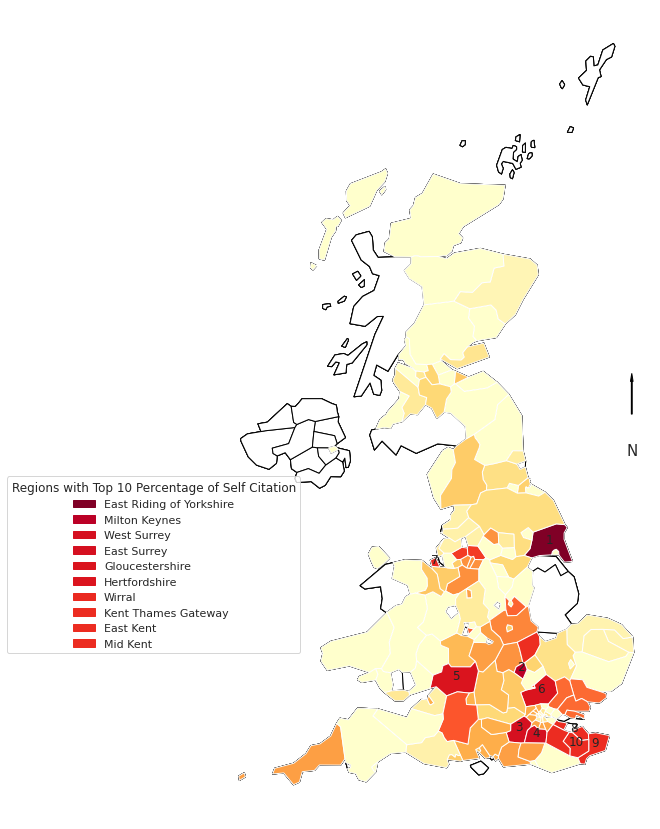

In [389]:
# Set the CRS of self_gdf to match the CRS of uk_gdf
new_norm_self_gdf = gpd.GeoDataFrame(new_norm_self_gdf, geometry='geometry')
new_norm_self_gdf = new_norm_self_gdf.to_crs(uk_gdf.crs)

# Now you can plot your data
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Create the base map
base = uk_gdf.plot(ax=ax, color='white', edgecolor='black')

# Add regions to the base map
new_norm_self_gdf.plot(ax=base, column='percentage of self citation', cmap='YlOrRd')

# Move the legend to the right
leg = ax.get_legend()

# Label regions
# Find the top 10 regions
top10 = new_norm_self_gdf.nlargest(10, 'percentage of self citation')
top10_colors = top10['percentage of self citation']

cmap = plt.get_cmap('YlOrRd')

# Get min and max citation counts for normalization
vmin = new_norm_self_gdf['percentage of self citation'].min()
vmax = new_norm_self_gdf['percentage of self citation'].max()

# Generate legend elements
legend_elements = []

# Add top 10 regions to the legend
for i, (idx, row) in enumerate(top10.iterrows()):
    color = cmap((row['percentage of self citation'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
    legend_elements.append(patch)
    
    # Add labels to the map
    ax.annotate(text=str(i+1), xy=row['geometry'].centroid.coords[0], ha='center')

# Create the legend
ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 Percentage of Self Citation')
# Add a north arrow
arrow = mpatches.Arrow(0.95, 0.5, 0, 0.05, width=0.01, transform=ax.transAxes, color='black')
ax.add_patch(arrow)
ax.text(0.95, 0.45, 'N', transform=ax.transAxes, ha='center', fontsize=15)

# Remove grid and axes
ax.grid(False)
ax.axis('off')
plt.savefig('Self_map.png', dpi=300, bbox_inches='tight')

plt.show()


In [7]:
from linearmodels import PanelOLS
import statsmodels.api as sm

In [56]:
# df_da = df_da.set_index(['reg_code', 'prio_year'])
# y = df_da['app_nbr']
# X = sm.add_constant(df_da.index.get_level_values('prio_year'))
# model = PanelOLS(y, X, entity_effects=True)
# results = model.fit()
# print(results)

### How diversity might influence the number of citations a patent receives: Shannon's entropy

In [294]:
merged_df.head()

Cited_App_nbr  in_degree reg_code_Cited  prio_year_cited
0  EP19780300148          3          UKI23             1977
1  EP19780300148          3          UKJ13             1977
2  EP19780100823          6          UKJ42             1977
3  EP19790301145          1          UKH33             1978
4  EP19790301142          1          UKH33             1978

In [281]:
df.head()

Unnamed: 0        app_nbr    appln_id  person_id                 inv_name  \
0           0  EP19780100395  16427449.0  2214748.0  Johnston, Michael Denis   
1           1  EP19780100395  16427449.0  2214748.0  Johnston, Michael Denis   
2           2  EP19780100395  16427449.0  2214748.0  Johnston, Michael Denis   
3           3  EP19780100463  16427512.0  2214885.0        Wilkinson, Samuel   
4           4  EP19780100463  16427512.0  2214885.0        Wilkinson, Samuel   

                             address reg_code ctry_code  prio_year  app_year  \
0       16 Altyre Way,Beckenham Kent    UKJ42        GB     1977.0    1978.0   
1       16 Altyre Way,Beckenham Kent    UKJ42        GB     1977.0    1978.0   
2       16 Altyre Way,Beckenham Kent    UKJ42        GB     1977.0    1978.0   
3  12 Bevington Road,Beckenham, Kent    UKJ42        GB     1977.0    1978.0   
4  12 Bevington Road,Beckenham, Kent    UKJ42        GB     1977.0    1978.0   

           IPC  
0   A61K038/21  
1  C07K014/555  
2   C12P021/00  
3   A61K038/00  
4   A61P001/12

In [284]:
df_sh = df[df['app_nbr'].isin(merged_df['Cited_App_nbr'])]

In [218]:
import numpy as np

In [255]:
grouped_ipc = df_sh.groupby('app_nbr')['IPC'].apply(list)

In [282]:
grouped_ipc

app_nbr
EP19780100395                [A61K038/21, C07K014/555, C12P021/00]
EP19780100463    [A61K038/00, A61P001/12, A61P011/14, A61P023/0...
EP19780100690    [A61K031/415, A61K031/4427, A61K031/445, A61P0...
EP19780100717    [A61K039/00, A61K047/48, C07K001/107, C12N011/06]
EP19780100823    [A61K, A61K031/415, A61K031/4166, A61K031/495,...
                                       ...                        
EP20130187592    [A61K031/485, A61K047/48, A61K047/64, C07K016/44]
EP20140155565                             [C07K016/16, C07K016/44]
EP20140198959                                         [C07K016/44]
EP20140725498                                         [C12Q001/68]
EP20150172604    [A61K009/14, A61K031/133, A61K031/137, A61K031...
Name: IPC, Length: 1108, dtype: object

In [285]:
def shannon_entropy(ipc_list):
    frequencies = pd.Series(ipc_list).value_counts(normalize=True)
    return -np.sum(frequencies * np.log(frequencies))

entropy_values = grouped_ipc.apply(shannon_entropy)

entropy_df = entropy_values.reset_index()
entropy_df.columns = ['app_nbr', 'Shannon_Entropy']

df_sh = pd.merge(df_sh, entropy_df, on='app_nbr', how='left')

df_sh.head()

Unnamed: 0        app_nbr    appln_id  person_id                 inv_name  \
0           0  EP19780100395  16427449.0  2214748.0  Johnston, Michael Denis   
1           1  EP19780100395  16427449.0  2214748.0  Johnston, Michael Denis   
2           2  EP19780100395  16427449.0  2214748.0  Johnston, Michael Denis   
3           3  EP19780100463  16427512.0  2214885.0        Wilkinson, Samuel   
4           4  EP19780100463  16427512.0  2214885.0        Wilkinson, Samuel   

                             address reg_code ctry_code  prio_year  app_year  \
0       16 Altyre Way,Beckenham Kent    UKJ42        GB     1977.0    1978.0   
1       16 Altyre Way,Beckenham Kent    UKJ42        GB     1977.0    1978.0   
2       16 Altyre Way,Beckenham Kent    UKJ42        GB     1977.0    1978.0   
3  12 Bevington Road,Beckenham, Kent    UKJ42        GB     1977.0    1978.0   
4  12 Bevington Road,Beckenham, Kent    UKJ42        GB     1977.0    1978.0   

           IPC  Shannon_Entropy  
0   A61K038/21         1.098612  
1  C07K014/555         1.098612  
2   C12P021/00         1.098612  
3   A61K038/00         2.079442  
4   A61P001/12         2.079442

In [286]:
print(entropy_df['Shannon_Entropy'].isna().sum())

0


In [295]:
merged_df = pd.merge(merged_df, entropy_df, left_on='Cited_App_nbr', right_on='app_nbr', how='left')

In [296]:
merged_df = merged_df.drop(['app_nbr'], axis=1)
merged_df.head()

Cited_App_nbr  in_degree reg_code_Cited  prio_year_cited  Shannon_Entropy
0  EP19780300148          3          UKI23             1977         2.302585
1  EP19780300148          3          UKJ13             1977         2.302585
2  EP19780100823          6          UKJ42             1977         2.995732
3  EP19790301145          1          UKH33             1978         2.079442
4  EP19790301142          1          UKH33             1978         1.945910

In [315]:
counts_entropy = merged_df.drop(['reg_code_Cited'], axis = 1)
counts_entropy = counts_entropy.drop_duplicates()
counts_entropy.head()

Cited_App_nbr  in_degree  prio_year_cited  Shannon_Entropy
0  EP19780300148          3             1977         2.302585
2  EP19780100823          6             1977         2.995732
3  EP19790301145          1             1978         2.079442
4  EP19790301142          1             1978         1.945910
5  EP19790301557          1             1978         1.386294

In [316]:
# Some patents in merged_df is not in df_sh
print(counts_entropy['Shannon_Entropy'].isna().sum())

595


In [317]:
# Extract rows where 'Shannon_Entropy' is null
null_entropy = counts_entropy[counts_entropy['Shannon_Entropy'].isnull()]
exists = null_entropy['Cited_App_nbr'].isin(citation['Cited_App_nbr'])
print(exists.value_counts())


True    595
Name: Cited_App_nbr, dtype: int64


In [318]:
cite_entro = citation[citation['Cited_App_nbr'].isin(null_entropy['Cited_App_nbr'])]
cite_entro = cite_entro[['Cited_App_nbr','IPC_Cited']]
cite_entro = cite_entro.drop_duplicates()
cite_entro.head()

Cited_App_nbr    IPC_Cited
209  EP19810303256   C07J041/00
317  EP19800303328   G01N033/53
339  EP19810109184  B01J027/125
486  EP19820301322   C07H019/06
522  EP19810305206  C07C 213/00

In [319]:
grouped_ipc_citation = cite_entro.groupby('Cited_App_nbr')['IPC_Cited'].apply(list)

entropy_values_citation = grouped_ipc_citation.apply(shannon_entropy)

entropy_df_citation = entropy_values_citation.reset_index()
entropy_df_citation.columns = ['Cited_App_nbr', 'Shannon_Entropy']
entropy_df_citation.head()

Cited_App_nbr  Shannon_Entropy
0  EP19790901156             -0.0
1  EP19800303143             -0.0
2  EP19800303328             -0.0
3  EP19800303457             -0.0
4  EP19800303992             -0.0

In [320]:
counts_entropy.set_index('Cited_App_nbr', inplace=True)
entropy_df_citation.set_index('Cited_App_nbr', inplace=True)
counts_entropy['Shannon_Entropy'].update(entropy_df_citation['Shannon_Entropy'])

counts_entropy.reset_index(inplace=True)
entropy_df_citation.reset_index(inplace=True)

In [321]:
print(counts_entropy['Shannon_Entropy'].isna().sum())

0


In [322]:
counts_entropy = pd.merge(counts_entropy, citations_count, on='Cited_App_nbr', how='left')

In [323]:
counts_entropy.head()

Cited_App_nbr  in_degree  prio_year_cited  Shannon_Entropy reg_code_Cited  \
0  EP19780300148          3             1977         2.302585          UKI23   
1  EP19780100823          6             1977         2.995732          UKJ42   
2  EP19790301145          1             1978         2.079442          UKH33   
3  EP19790301142          1             1978         1.945910          UKH33   
4  EP19790301557          1             1978         1.386294          UKJ23   

   citation_count  
0             3.0  
1             6.0  
2             1.0  
3             1.0  
4             1.0

In [324]:
print(counts_entropy['reg_code_Cited'].isnull().sum())

465


In [325]:
# Because some patents do not have citations in the next 5 years
counts_entropy = counts_entropy.dropna(subset = ['citation_count'])

In [326]:
print(counts_entropy['citation_count'].isnull().sum())

0


In [327]:
counts_entropy.head()

Cited_App_nbr  in_degree  prio_year_cited  Shannon_Entropy reg_code_Cited  \
0  EP19780300148          3             1977         2.302585          UKI23   
1  EP19780100823          6             1977         2.995732          UKJ42   
2  EP19790301145          1             1978         2.079442          UKH33   
3  EP19790301142          1             1978         1.945910          UKH33   
4  EP19790301557          1             1978         1.386294          UKJ23   

   citation_count  
0             3.0  
1             6.0  
2             1.0  
3             1.0  
4             1.0

In [328]:
counts_entropy.to_csv('Counts_Entropy.csv', index=False)

In [164]:
import statsmodels.api as sm

X = counts_entropy['Shannon_Entropy']
y = counts_entropy['in_degree']
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              in_degree   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     93.61
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.37e-21
Time:                        17:28:30   Log-Likelihood:                -3840.5
No. Observations:                1703   AIC:                             7685.
Df Residuals:                    1701   BIC:                             7696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2278      0.080     

In [329]:
import statsmodels.api as sm

X = counts_entropy['Shannon_Entropy']
y = counts_entropy['citation_count']
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         citation_count   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     76.14
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           8.39e-18
Time:                        12:33:57   Log-Likelihood:                -2317.9
No. Observations:                1238   AIC:                             4640.
Df Residuals:                    1236   BIC:                             4650.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2078      0.067     

# statistically significant positive effect on the number of citations it receives, but the model explains only a small portion of the variation in the number of citations. 

1. The coefficient for Shannon Entropy is 0.4979: for each unit increase in Shannon Entropy, the number of citations a patent receives increases by about 0.498. This result is statistically significant, as the p-value is less than 0.05.

2. The R-squared value is 0.052: only about 5.2% of the variation in the number of citations a patent receives can be explained by its Shannon Entropy. While there is a significant relationship, there are likely other factors not included in this model that also have an impact on the number of citations a patent receives.

3. The residuals: not normally distributed --- the Omnibus test p-value is close to 0, and there is a high degree of skewness and kurtosis. Potentially violate the assumptions of the OLS regression model and may impact the reliability of the results. 

4. The results suggest that the diversity of IPC codes in a patent does have a significant positive effect on the number of citations it receives, but the model explains only a small portion of the variation in the number of citations. Identify more other factors that could explain more of this variation.

# Other factors:

1. **Research and Development (R&D) Expenditure**: The amount of money invested in R&D can significantly influence the number of patents: OECD.

2. **Government Policies and Regulations**

3. **Economic Factors**: GDP growth: World Bank, OECD.

4. **Scientific Progress and Technological Change**: The number of scientific publications in related fields.

5. **Education and Human Capital**: The number of graduates in relevant fields, the number of researchers working in the pharmaceutical industry.